# Neural Network classification: a cut triangle shaped problem

**A project by:**
- Bergamin Eleonora
- Boni Filippo
- Campagnola Stefano
- Santagata Luca

**Group 03**

Run this jupyter notebook in the same directory of the files and folders zipped together with it.

The two random seed to tune are 12345 (this has to been set in all functions) and 23456.

In order to get the correct results, the hyperparameters of the NN need to be adjusted at every step with the higher performing ones.

## INITIAL NEURAL NETWORK

In [1]:
# libraries
from keras import models
from keras import layers
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from numpy.random import seed
import math
import matplotlib.pyplot as plt

# set random seed
seed_value= 12345
import os
os.environ['PYTHONHASHSEED']=str(seed_value)

import random
random.seed(seed_value)

import numpy as np
np.random.seed(seed_value)


import tensorflow as tf
tf.random.set_seed(23456)

import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

from keras import backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

def set_seed(seed):  # function for setting the seed everytime needed
    
    os.environ['PYTHONHASHSEED']=str(seed_value)
    random.seed(seed_value)
    np.random.seed(seed_value)
    tf.random.set_seed(23456)

data: 4000
train: 3200


<function matplotlib.pyplot.show(close=None, block=None)>

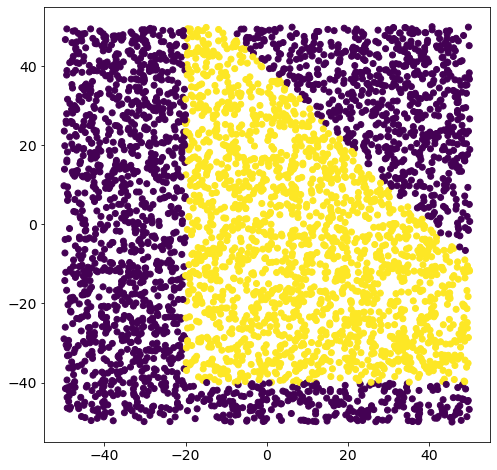

In [2]:
%run nonlinear_function.py

# training data
perc_train = 0.8

TYPE=1
x = np.loadtxt(filename("data",TYPE), delimiter=' ')
y = np.loadtxt(filename("labels",TYPE), delimiter=' ')
N = len(x)

# dim. of a sample
L = len(x[0])

N_train = int(perc_train * N)
print(f'data: {N}\ntrain: {N_train}')

plt.figure(figsize = (8,8))
plt.scatter(x[:,0],x[:,1],c=y)
plt.show

In [3]:
(x_train, y_train) = (x[0:N_train],y[0:N_train])
(x_valid, y_valid) = (x[N_train:],y[N_train:])
print("Train:",len(x_train),"\t Validation:",len(x_valid))

Train: 3200 	 Validation: 800


In [4]:
def Rescale(x):
    #return (x-x.mean())/np.sqrt(x.var())
    return x/50

x_train = Rescale(x_train)
x_valid = Rescale(x_valid)

In [5]:
seed_value= 12345
set_seed(seed=seed_value)
model = Sequential()
model.add(Dense(L,input_shape=(L,),activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))
nepoch=400
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 6         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                60        
_________________________________________________________________
dense_2 (Dense)              (None, 20)                420       
_________________________________________________________________
dropout (Dropout)            (None, 20)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 21        
Total params: 507
Trainable params: 507
Non-trainable params: 0
_________________________________________________________________
None


In [6]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [7]:
fit = model.fit(x_train, y_train,
               epochs = nepoch, batch_size = 50,
               validation_data=(x_valid,y_valid),
               verbose=2)

Epoch 1/400
64/64 - 0s - loss: 0.6858 - accuracy: 0.5944 - val_loss: 0.6692 - val_accuracy: 0.6525
Epoch 2/400
64/64 - 0s - loss: 0.6587 - accuracy: 0.6628 - val_loss: 0.6409 - val_accuracy: 0.6862
Epoch 3/400
64/64 - 0s - loss: 0.6347 - accuracy: 0.6959 - val_loss: 0.6177 - val_accuracy: 0.6950
Epoch 4/400
64/64 - 0s - loss: 0.6131 - accuracy: 0.7134 - val_loss: 0.6017 - val_accuracy: 0.7063
Epoch 5/400
64/64 - 0s - loss: 0.5883 - accuracy: 0.7372 - val_loss: 0.5711 - val_accuracy: 0.7362
Epoch 6/400
64/64 - 0s - loss: 0.5504 - accuracy: 0.7659 - val_loss: 0.5245 - val_accuracy: 0.7763
Epoch 7/400
64/64 - 0s - loss: 0.4966 - accuracy: 0.7906 - val_loss: 0.4677 - val_accuracy: 0.8087
Epoch 8/400
64/64 - 0s - loss: 0.4420 - accuracy: 0.8203 - val_loss: 0.4096 - val_accuracy: 0.8388
Epoch 9/400
64/64 - 0s - loss: 0.3957 - accuracy: 0.8422 - val_loss: 0.3675 - val_accuracy: 0.8612
Epoch 10/400
64/64 - 0s - loss: 0.3601 - accuracy: 0.8687 - val_loss: 0.3306 - val_accuracy: 0.8863
Epoch 11/

Epoch 84/400
64/64 - 0s - loss: 0.2198 - accuracy: 0.9281 - val_loss: 0.2037 - val_accuracy: 0.9287
Epoch 85/400
64/64 - 0s - loss: 0.2170 - accuracy: 0.9256 - val_loss: 0.2048 - val_accuracy: 0.9287
Epoch 86/400
64/64 - 0s - loss: 0.2199 - accuracy: 0.9256 - val_loss: 0.2039 - val_accuracy: 0.9287
Epoch 87/400
64/64 - 0s - loss: 0.2211 - accuracy: 0.9269 - val_loss: 0.2041 - val_accuracy: 0.9275
Epoch 88/400
64/64 - 0s - loss: 0.2218 - accuracy: 0.9256 - val_loss: 0.2035 - val_accuracy: 0.9287
Epoch 89/400
64/64 - 0s - loss: 0.2209 - accuracy: 0.9237 - val_loss: 0.2042 - val_accuracy: 0.9287
Epoch 90/400
64/64 - 0s - loss: 0.2204 - accuracy: 0.9266 - val_loss: 0.2031 - val_accuracy: 0.9312
Epoch 91/400
64/64 - 0s - loss: 0.2206 - accuracy: 0.9247 - val_loss: 0.2034 - val_accuracy: 0.9312
Epoch 92/400
64/64 - 0s - loss: 0.2210 - accuracy: 0.9259 - val_loss: 0.2038 - val_accuracy: 0.9287
Epoch 93/400
64/64 - 0s - loss: 0.2200 - accuracy: 0.9250 - val_loss: 0.2046 - val_accuracy: 0.9300


Epoch 166/400
64/64 - 0s - loss: 0.2145 - accuracy: 0.9262 - val_loss: 0.1991 - val_accuracy: 0.9312
Epoch 167/400
64/64 - 0s - loss: 0.2144 - accuracy: 0.9266 - val_loss: 0.1984 - val_accuracy: 0.9312
Epoch 168/400
64/64 - 0s - loss: 0.2132 - accuracy: 0.9275 - val_loss: 0.2002 - val_accuracy: 0.9300
Epoch 169/400
64/64 - 0s - loss: 0.2132 - accuracy: 0.9281 - val_loss: 0.1987 - val_accuracy: 0.9312
Epoch 170/400
64/64 - 0s - loss: 0.2137 - accuracy: 0.9269 - val_loss: 0.1989 - val_accuracy: 0.9287
Epoch 171/400
64/64 - 0s - loss: 0.2141 - accuracy: 0.9272 - val_loss: 0.2002 - val_accuracy: 0.9287
Epoch 172/400
64/64 - 0s - loss: 0.2128 - accuracy: 0.9269 - val_loss: 0.1998 - val_accuracy: 0.9287
Epoch 173/400
64/64 - 0s - loss: 0.2157 - accuracy: 0.9259 - val_loss: 0.2000 - val_accuracy: 0.9300
Epoch 174/400
64/64 - 0s - loss: 0.2122 - accuracy: 0.9275 - val_loss: 0.1977 - val_accuracy: 0.9312
Epoch 175/400
64/64 - 0s - loss: 0.2137 - accuracy: 0.9266 - val_loss: 0.1980 - val_accurac

Epoch 248/400
64/64 - 0s - loss: 0.2131 - accuracy: 0.9266 - val_loss: 0.2001 - val_accuracy: 0.9287
Epoch 249/400
64/64 - 0s - loss: 0.2132 - accuracy: 0.9275 - val_loss: 0.1976 - val_accuracy: 0.9312
Epoch 250/400
64/64 - 0s - loss: 0.2117 - accuracy: 0.9272 - val_loss: 0.1983 - val_accuracy: 0.9300
Epoch 251/400
64/64 - 0s - loss: 0.2109 - accuracy: 0.9272 - val_loss: 0.1974 - val_accuracy: 0.9312
Epoch 252/400
64/64 - 0s - loss: 0.2115 - accuracy: 0.9269 - val_loss: 0.1969 - val_accuracy: 0.9312
Epoch 253/400
64/64 - 0s - loss: 0.2129 - accuracy: 0.9269 - val_loss: 0.1988 - val_accuracy: 0.9287
Epoch 254/400
64/64 - 0s - loss: 0.2120 - accuracy: 0.9269 - val_loss: 0.1974 - val_accuracy: 0.9300
Epoch 255/400
64/64 - 0s - loss: 0.2104 - accuracy: 0.9281 - val_loss: 0.2014 - val_accuracy: 0.9287
Epoch 256/400
64/64 - 0s - loss: 0.2111 - accuracy: 0.9275 - val_loss: 0.1980 - val_accuracy: 0.9287
Epoch 257/400
64/64 - 0s - loss: 0.2112 - accuracy: 0.9272 - val_loss: 0.1974 - val_accurac

Epoch 330/400
64/64 - 0s - loss: 0.2164 - accuracy: 0.9253 - val_loss: 0.2033 - val_accuracy: 0.9275
Epoch 331/400
64/64 - 0s - loss: 0.2117 - accuracy: 0.9259 - val_loss: 0.1977 - val_accuracy: 0.9300
Epoch 332/400
64/64 - 0s - loss: 0.2124 - accuracy: 0.9253 - val_loss: 0.1988 - val_accuracy: 0.9300
Epoch 333/400
64/64 - 0s - loss: 0.2102 - accuracy: 0.9272 - val_loss: 0.1969 - val_accuracy: 0.9312
Epoch 334/400
64/64 - 0s - loss: 0.2108 - accuracy: 0.9269 - val_loss: 0.1995 - val_accuracy: 0.9300
Epoch 335/400
64/64 - 0s - loss: 0.2124 - accuracy: 0.9269 - val_loss: 0.1971 - val_accuracy: 0.9312
Epoch 336/400
64/64 - 0s - loss: 0.2075 - accuracy: 0.9287 - val_loss: 0.1966 - val_accuracy: 0.9312
Epoch 337/400
64/64 - 0s - loss: 0.2097 - accuracy: 0.9287 - val_loss: 0.1973 - val_accuracy: 0.9312
Epoch 338/400
64/64 - 0s - loss: 0.2110 - accuracy: 0.9269 - val_loss: 0.1977 - val_accuracy: 0.9300
Epoch 339/400
64/64 - 0s - loss: 0.2119 - accuracy: 0.9278 - val_loss: 0.1985 - val_accurac

51 2601
[50. 50.]


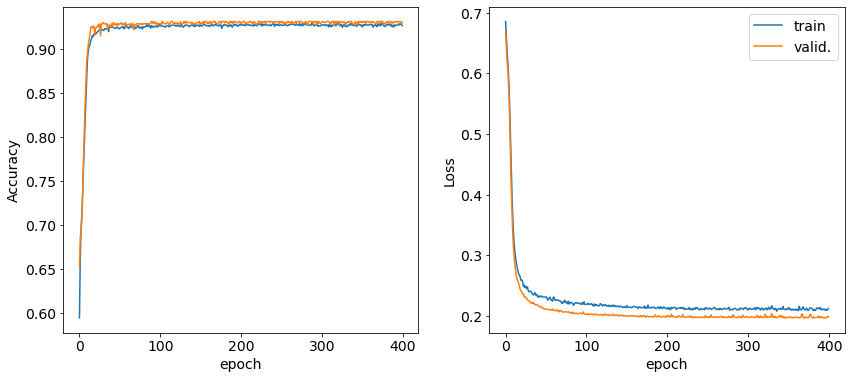

In [8]:
fig,AX=plt.subplots(1,2,figsize=(14,6.))
ax=AX[0]
ax.plot(fit.history['accuracy'],label="train")
ax.plot(fit.history['val_accuracy'],label="valid.")
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")
ax=AX[1]
ax.plot(fit.history['loss'],label="train")
ax.plot(fit.history['val_loss'],label="valid.")
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()

dX = 2
X1 = np.arange(-50,50+dX, dX)
LG = len(X1)
grid = np.zeros((LG*LG,2))
k=0
for i in range(LG):
    for j in range(LG):
        grid[k,:]=(X1[j],X1[i])
        k=k+1
print(len(X1),len(grid))
print(grid[-1])

grid_r = grid/50

pred = model.predict(grid_r)

<function matplotlib.pyplot.show(close=None, block=None)>

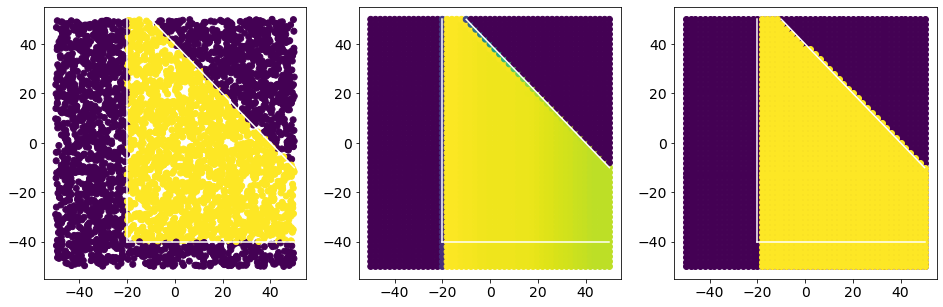

In [9]:
def boundaries():    
    ax.plot((-20,-20),(-40,50),c="w")
    ax.plot((-20,50),(-40,-40),c="w")
    ax.plot((-10,50),(50,-10),c="w")
fig,AX=plt.subplots(1,3,figsize=(16,5.))
ax=AX[0]
ax.scatter(x[:,0],x[:,1],c=y)
boundaries()
ax=AX[1]
ax.scatter(grid[:,0],grid[:,1],c=pred)
boundaries()
ax=AX[2]
W1=np.where(pred>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#440154")
ax.scatter(grid[W1,0],grid[W1,1],c="#fde725")
boundaries()
plt.show
plt.show

## INCREASING OR DECREASING N SAMPLES

In [10]:
from matplotlib.ticker import AutoMinorLocator, MultipleLocator

In [11]:
# these files are obtained training the initial Neural Network with different number of samples

train_accuracy2000 = np.loadtxt('data for plot N/train_accuracy2000.txt')
train_accuracy3000 = np.loadtxt('data for plot N/train_accuracy3000.txt')
train_accuracy4000 = np.loadtxt('data for plot N/train_accuracy4000.txt')
train_accuracy6000 = np.loadtxt('data for plot N/train_accuracy6000.txt')
train_accuracy8000 = np.loadtxt('data for plot N/train_accuracy8000.txt')
train_accuracy10000 = np.loadtxt('data for plot N/train_accuracy10000.txt')
train_accuracy15000 = np.loadtxt('data for plot N/train_accuracy15000.txt')

val_accuracy2000 = np.loadtxt('data for plot N/val_accuracy2000.txt')
val_accuracy3000 = np.loadtxt('data for plot N/val_accuracy3000.txt')
val_accuracy4000 = np.loadtxt('data for plot N/val_accuracy4000.txt')
val_accuracy6000 = np.loadtxt('data for plot N/val_accuracy6000.txt')
val_accuracy8000 = np.loadtxt('data for plot N/val_accuracy8000.txt')
val_accuracy10000 = np.loadtxt('data for plot N/val_accuracy10000.txt')
val_accuracy15000 = np.loadtxt('data for plot N/val_accuracy15000.txt')

train_loss2000 = np.loadtxt('data for plot N/train_loss2000.txt')
train_loss3000 = np.loadtxt('data for plot N/train_loss3000.txt')
train_loss4000 = np.loadtxt('data for plot N/train_loss4000.txt')
train_loss6000 = np.loadtxt('data for plot N/train_loss6000.txt')
train_loss8000 = np.loadtxt('data for plot N/train_loss8000.txt')
train_loss10000 = np.loadtxt('data for plot N/train_loss10000.txt')
train_loss15000 = np.loadtxt('data for plot N/train_loss15000.txt')

val_loss2000 = np.loadtxt('data for plot N/val_loss2000.txt')
val_loss3000 = np.loadtxt('data for plot N/val_loss3000.txt')
val_loss4000 = np.loadtxt('data for plot N/val_loss4000.txt')
val_loss6000 = np.loadtxt('data for plot N/val_loss6000.txt')
val_loss8000 = np.loadtxt('data for plot N/val_loss8000.txt')
val_loss10000 = np.loadtxt('data for plot N/val_loss10000.txt')
val_loss15000 = np.loadtxt('data for plot N/val_loss15000.txt')

N = np.array([2000, 3000, 4000, 6000, 8000, 10000, 15000])

Text(0.5, 1.0, 'Train accuracy vs epochs')

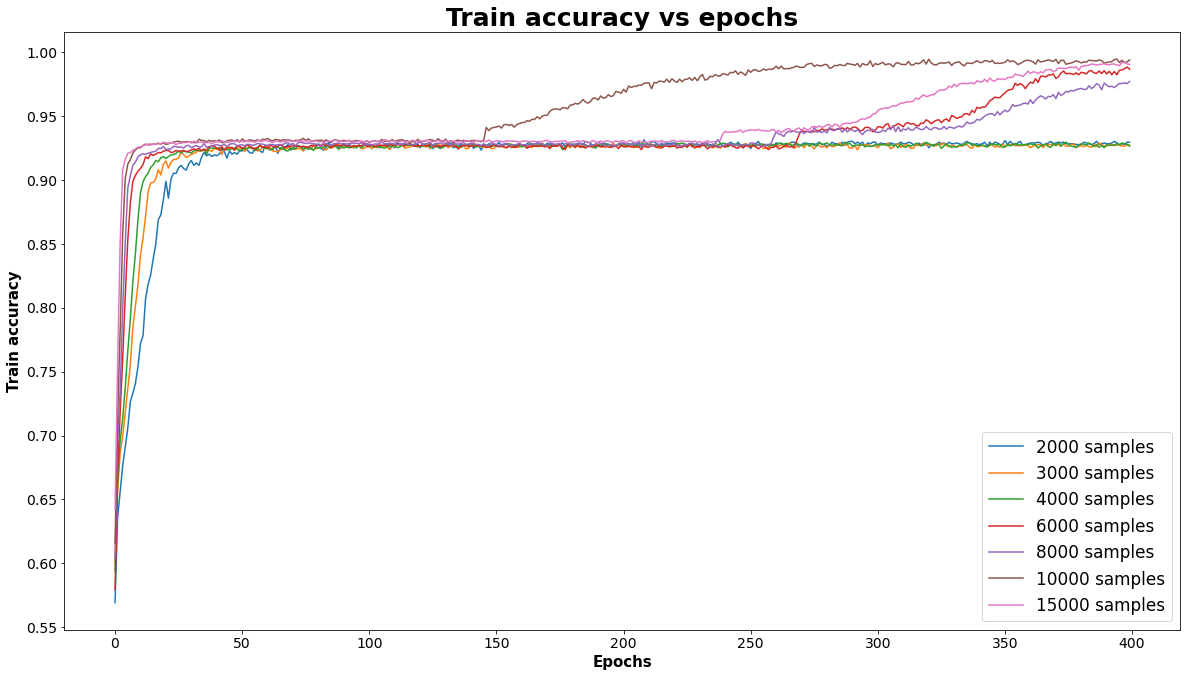

In [12]:
fig, ax = plt.subplots(figsize = (20,11))
a=1.5
ax.plot(train_accuracy2000, label = '2000 samples', linewidth =a)
ax.plot(train_accuracy3000, label = '3000 samples',linewidth =a)
ax.plot(train_accuracy4000, label = '4000 samples',linewidth =a)
ax.plot(train_accuracy6000, label = '6000 samples',linewidth =a)
ax.plot(train_accuracy8000, label = '8000 samples',linewidth =a)
ax.plot(train_accuracy10000, label = '10000 samples',linewidth =a)
ax.plot(train_accuracy15000, label = '15000 samples',linewidth =a)
ax.legend(loc="best",fontsize='large')
ax.set_xlabel("Epochs",fontsize=15,fontweight="bold")
ax.set_ylabel("Train accuracy",fontsize=15,fontweight="bold")
ax.xaxis.set_major_locator(MultipleLocator(50))
ax.yaxis.set_major_locator(MultipleLocator(0.05))
ax.set_title("Train accuracy vs epochs",fontsize=25,fontweight="bold")

Text(0.5, 1.0, 'Validation accuracy vs epochs')

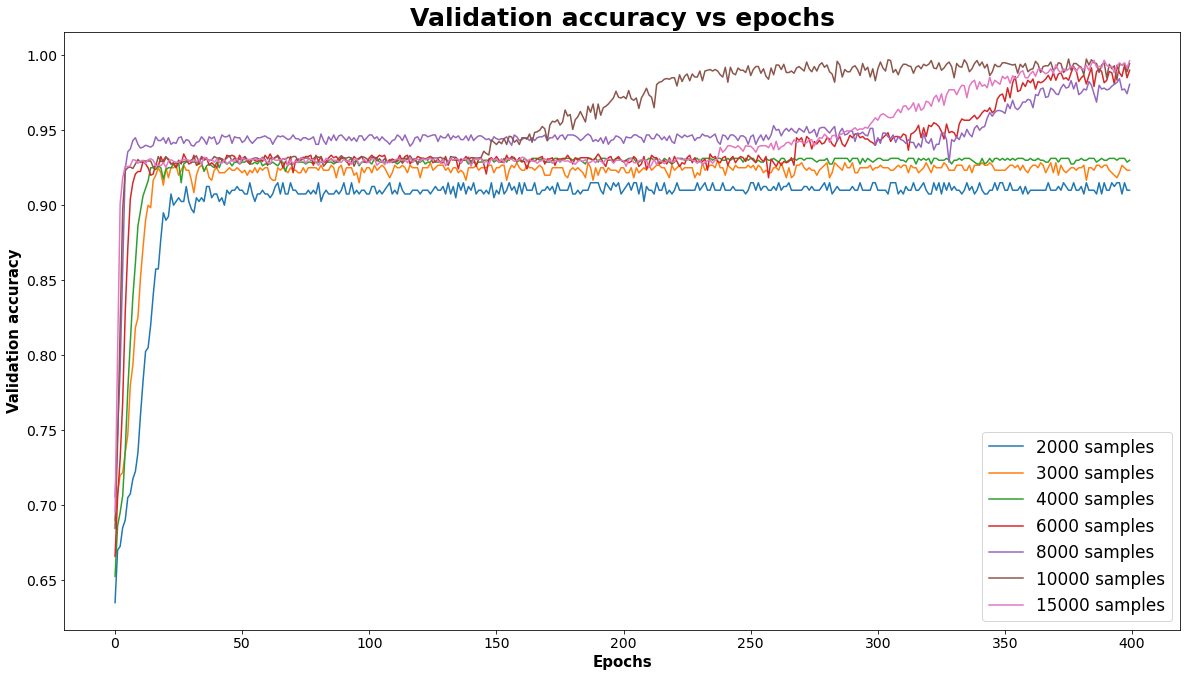

In [13]:
fig, ax = plt.subplots(figsize = (20,11))
a=1.5
ax.plot(val_accuracy2000, label = '2000 samples',linewidth =a)
ax.plot(val_accuracy3000, label = '3000 samples',linewidth =a)
ax.plot(val_accuracy4000, label = '4000 samples',linewidth =a)
ax.plot(val_accuracy6000, label = '6000 samples',linewidth =a)
ax.plot(val_accuracy8000, label = '8000 samples',linewidth =a)
ax.plot(val_accuracy10000, label = '10000 samples',linewidth =a)
ax.plot(val_accuracy15000, label = '15000 samples',linewidth =a)
ax.legend(loc="best",fontsize='large')
ax.set_xlabel("Epochs",fontsize=15,fontweight="bold")
ax.set_ylabel("Validation accuracy",fontsize=15,fontweight="bold")
ax.xaxis.set_major_locator(MultipleLocator(50))
ax.yaxis.set_major_locator(MultipleLocator(0.05))
ax.set_title("Validation accuracy vs epochs",fontsize=25,fontweight="bold")

Text(0.5, 1.0, 'Train loss vs epochs')

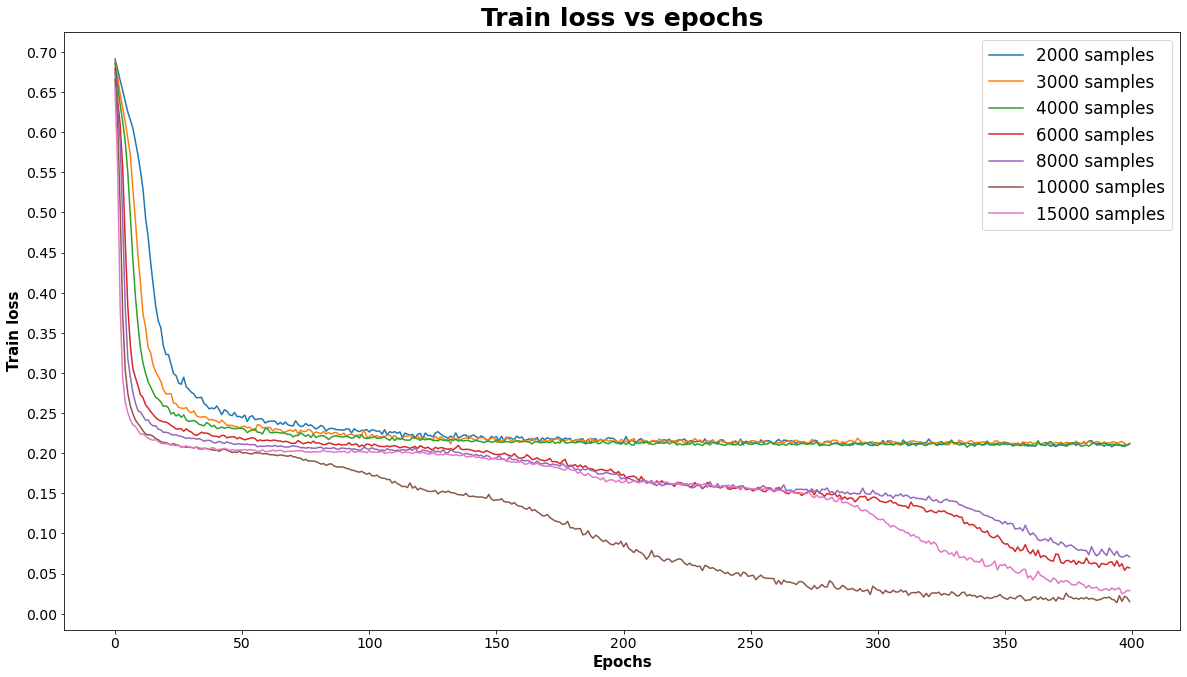

In [14]:
fig, ax = plt.subplots(figsize = (20,11))
a=1.5
ax.plot(train_loss2000, label = '2000 samples', linewidth =a)
ax.plot(train_loss3000, label = '3000 samples',linewidth =a)
ax.plot(train_loss4000, label = '4000 samples',linewidth =a)
ax.plot(train_loss6000, label = '6000 samples',linewidth =a)
ax.plot(train_loss8000, label = '8000 samples',linewidth =a)
ax.plot(train_loss10000, label = '10000 samples',linewidth =a)
ax.plot(train_loss15000, label = '15000 samples',linewidth =a)
ax.legend(loc="best",fontsize='large')
ax.set_xlabel("Epochs",fontsize=15,fontweight="bold")
ax.set_ylabel("Train loss",fontsize=15,fontweight="bold")
ax.xaxis.set_major_locator(MultipleLocator(50))
ax.yaxis.set_major_locator(MultipleLocator(0.05))
ax.set_title("Train loss vs epochs",fontsize=25,fontweight="bold")

Text(0.5, 1.0, 'Validation loss vs epochs')

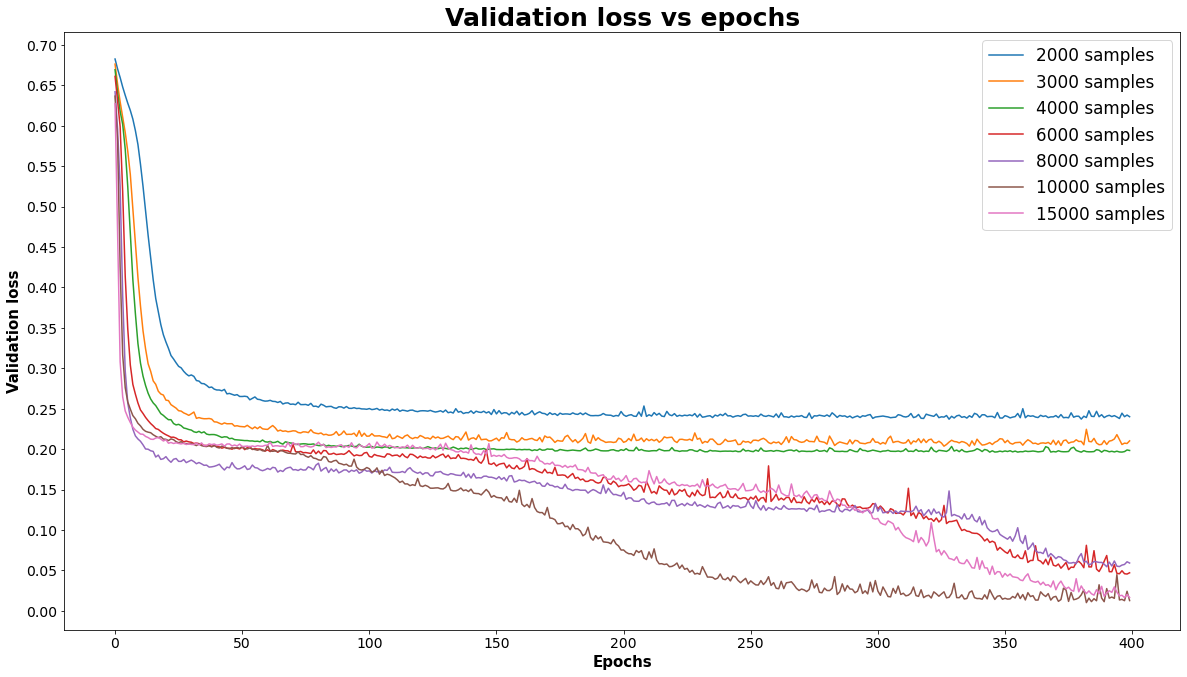

In [15]:
fig, ax = plt.subplots(figsize = (20,11))
a=1.5
ax.plot(val_loss2000, label = '2000 samples', linewidth =a)
ax.plot(val_loss3000, label = '3000 samples',linewidth =a)
ax.plot(val_loss4000, label = '4000 samples',linewidth =a)
ax.plot(val_loss6000, label = '6000 samples',linewidth =a)
ax.plot(val_loss8000, label = '8000 samples',linewidth =a)
ax.plot(val_loss10000, label = '10000 samples',linewidth =a)
ax.plot(val_loss15000, label = '15000 samples',linewidth =a)
ax.legend(loc="best",fontsize='large')
ax.set_xlabel("Epochs",fontsize=15,fontweight="bold")
ax.set_ylabel("Validation loss",fontsize=15,fontweight="bold")
ax.xaxis.set_major_locator(MultipleLocator(50))
ax.yaxis.set_major_locator(MultipleLocator(0.05))
ax.set_title("Validation loss vs epochs",fontsize=25,fontweight="bold")

Text(0.5, 1.0, 'Train and validation accuracy comparison')

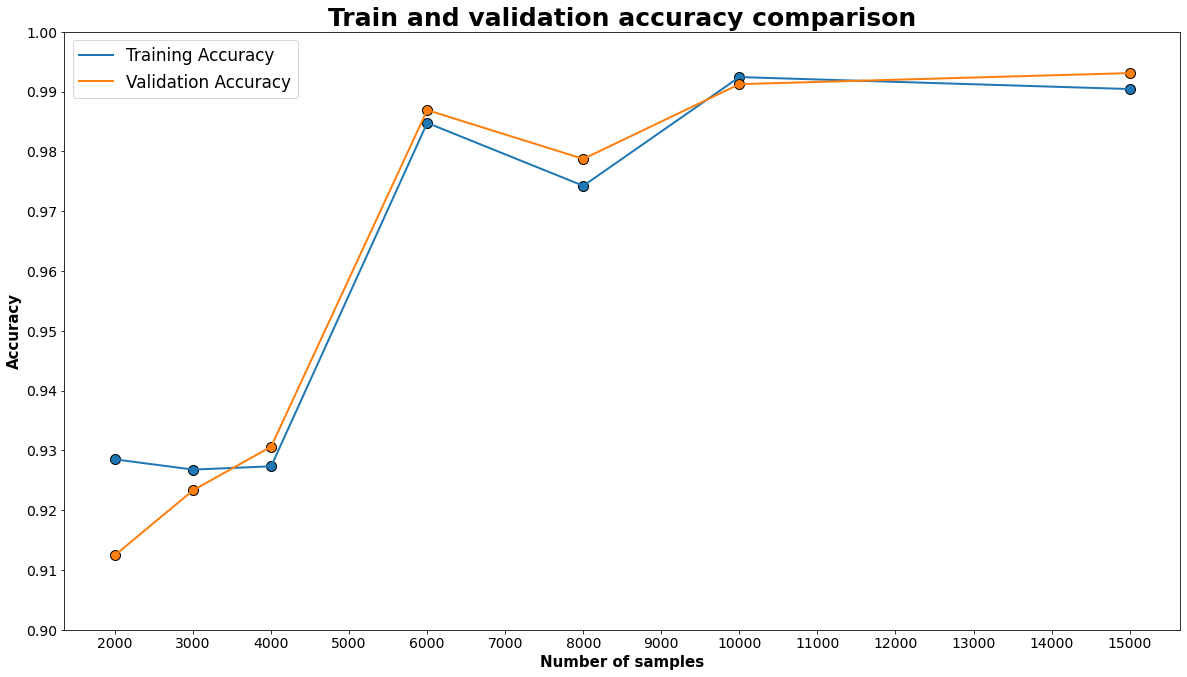

In [16]:
# plot that helps to discover the possible presence of overfitting

train_accuracy = np.array([train_accuracy2000[-11:-1].mean(), 
                           train_accuracy3000[-11:-1].mean(), 
                           train_accuracy4000[-11:-1].mean(), 
                           train_accuracy6000[-11:-1].mean(), 
                           train_accuracy8000[-11:-1].mean(), 
                           train_accuracy10000[-11:-1].mean(), 
                           train_accuracy15000[-11:-1].mean()])

val_accuracy = np.array([val_accuracy2000[-11:-1].mean(),
                         val_accuracy3000[-11:-1].mean(),
                         val_accuracy4000[-11:-1].mean(),
                         val_accuracy6000[-11:-1].mean(),
                         val_accuracy8000[-11:-1].mean(),
                         val_accuracy10000[-11:-1].mean(),
                         val_accuracy15000[-11:-1].mean()])


fig, ax = plt.subplots(figsize = (20,11))
ax.plot(N, train_accuracy, label = 'Training Accuracy',linewidth=2)
ax.scatter(N, train_accuracy, s=100, edgecolor="black")

ax.plot(N, val_accuracy, label = 'Validation Accuracy', linewidth=2)
ax.scatter(N, val_accuracy, s=100,  edgecolor="black")

ax.legend(loc="best",fontsize='large')
ax.set_ylim(0.9,1)
ax.set_xlabel("Number of samples",fontsize=15,fontweight="bold")
ax.set_ylabel("Accuracy",fontsize=15,fontweight="bold")
ax.xaxis.set_major_locator(MultipleLocator(1000))
ax.yaxis.set_major_locator(MultipleLocator(0.01))
ax.set_title("Train and validation accuracy comparison",fontsize=25,fontweight="bold")

Text(0.5, 1.0, 'Train and validation loss comparison')

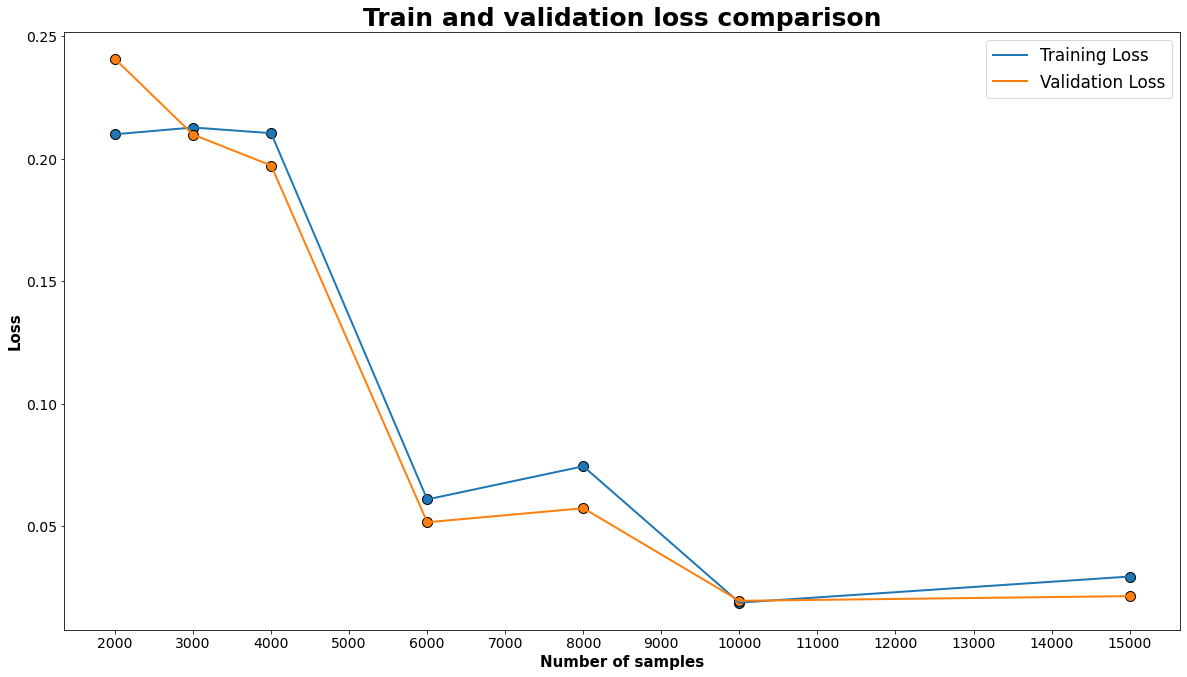

In [17]:
train_accuracy = np.array([train_loss2000[-11:-1].mean(), 
                           train_loss3000[-11:-1].mean(), 
                           train_loss4000[-11:-1].mean(), 
                           train_loss6000[-11:-1].mean(), 
                           train_loss8000[-11:-1].mean(), 
                           train_loss10000[-11:-1].mean(), 
                           train_loss15000[-11:-1].mean()])

val_accuracy = np.array([val_loss2000[-11:-1].mean(),
                         val_loss3000[-11:-1].mean(),
                         val_loss4000[-11:-1].mean(),
                         val_loss6000[-11:-1].mean(),
                         val_loss8000[-11:-1].mean(),
                         val_loss10000[-11:-1].mean(),
                         val_loss15000[-11:-1].mean()])


fig, ax = plt.subplots(figsize = (20,11))
ax.plot(N, train_accuracy, label = 'Training Loss',linewidth=2)
ax.scatter(N, train_accuracy, s=100, edgecolor="black")

ax.plot(N, val_accuracy, label = 'Validation Loss', linewidth=2)
ax.scatter(N, val_accuracy, s=100,  edgecolor="black")

ax.legend(loc="best",fontsize='large')
ax.set_xlabel("Number of samples",fontsize=15,fontweight="bold")
ax.set_ylabel("Loss",fontsize=15,fontweight="bold")
ax.xaxis.set_major_locator(MultipleLocator(1000))
ax.yaxis.set_major_locator(MultipleLocator(0.05))
ax.set_title("Train and validation loss comparison",fontsize=25,fontweight="bold")

# AUGMENTATION

data: 4000
train: 3200


<function matplotlib.pyplot.show(close=None, block=None)>

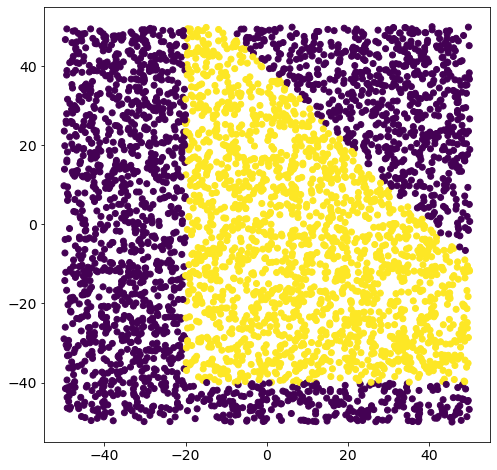

In [18]:
seed_value= 12345
set_seed(seed=seed_value)
%run nonlinear_function.py

perc_train = 0.8

TYPE=1
x = np.loadtxt(filename("data",TYPE), delimiter=' ')
y = np.loadtxt(filename("labels",TYPE), delimiter=' ')
N = len(x)

# dim. of a sample
L = len(x[0])

N_train = int(perc_train * N)
print(f'data: {N}\ntrain: {N_train}')

plt.figure(figsize = (8,8))
plt.scatter(x[:,0],x[:,1],c=y)
plt.show

In [19]:
# functions for augmentation

def pick_unif(x,y):
    TYPE =1
        
    a=np.random.uniform(-1,1,len(x))
    b=np.random.uniform(-1,1,len(x))
    augm_0 = x[:,0]+a
    augm_1 = x[:,1]+b
    x_augmented = [augm_0,augm_1]
    x_augmented=np.asarray(x_augmented).T
    y_augmented = []
    for sample in x_augmented:
        y_augmented.append(f(sample,TYPE))
    x_augmented=np.reshape(x_augmented,(len(x),2))
    y_augmented=np.array(y_augmented) 

    x_tot = np.concatenate((x,np.asarray(x_augmented)),axis=0)
    y_tot = np.concatenate((y,y_augmented),axis=0)
        
    return x_tot, y_tot, x, y, x_augmented, y_augmented

def pick_norm(x,y):
    TYPE =1

    a=np.random.normal(0, 1, len(x))
    b=np.random.normal(0, 1, len(x))
    augm_0 = x[:,0]+a
    augm_1 = x[:,1]+b
    x_augmented = [augm_0,augm_1]
    x_augmented=np.asarray(x_augmented).T
    y_augmented = []
    for sample in x_augmented:
        y_augmented.append(f(sample,TYPE))
    x_augmented=np.reshape(x_augmented,(len(x),2))
    y_augmented=np.array(y_augmented) 

    x_tot = np.concatenate((x,np.asarray(x_augmented)),axis=0)
    y_tot = np.concatenate((y,y_augmented),axis=0)
        
    return x_tot, y_tot, x, y, x_augmented, y_augmented

In [20]:
(x_train, y_train) = (x[0:N_train],y[0:N_train])
(x_valid, y_valid) = (x[N_train:],y[N_train:])
print("Train:",len(x_train),"\t Validation:",len(x_valid))

Train: 3200 	 Validation: 800


In [21]:
# different sets, the total train is splitted in initial train + augmented data

x_train_tot, y_train_tot, x_train, y_train, x_aug, y_aug = pick_norm(x_train,y_train)
print(x_train_tot.shape)
print(x_train.shape)
print(x_aug.shape)
print(x_valid.shape)

(6400, 2)
(3200, 2)
(3200, 2)
(800, 2)


In [22]:
def Rescale(x):
    #return (x-x.mean())/np.sqrt(x.var())
    return x/(50+0)

x_train_tot = Rescale(x_train_tot)
x_valid = Rescale(x_valid)

In [23]:
seed_value= 12345
set_seed(seed=seed_value)
model = Sequential()
model.add(Dense(L,input_shape=(L,),activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))
nepoch=400
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_5 (Dense)              (None, 20)                60        
_________________________________________________________________
dense_6 (Dense)              (None, 20)                420       
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 21        
Total params: 507
Trainable params: 507
Non-trainable params: 0
_________________________________________________________________
None


In [24]:
model.compile(loss='binary_crossentropy',
              #optimizer='RMSprop',
              optimizer='adam',
              metrics=['accuracy'])

In [25]:
fit = model.fit(x_train_tot, y_train_tot,
               epochs = nepoch, batch_size = 50,
               validation_data=(x_valid,y_valid),
               verbose=2)

Epoch 1/400
128/128 - 0s - loss: 0.6726 - accuracy: 0.6270 - val_loss: 0.6419 - val_accuracy: 0.6850
Epoch 2/400
128/128 - 0s - loss: 0.6218 - accuracy: 0.7067 - val_loss: 0.5990 - val_accuracy: 0.7050
Epoch 3/400
128/128 - 0s - loss: 0.5663 - accuracy: 0.7569 - val_loss: 0.5171 - val_accuracy: 0.7850
Epoch 4/400
128/128 - 0s - loss: 0.4631 - accuracy: 0.8138 - val_loss: 0.4016 - val_accuracy: 0.8500
Epoch 5/400
128/128 - 0s - loss: 0.3698 - accuracy: 0.8605 - val_loss: 0.3256 - val_accuracy: 0.8900
Epoch 6/400
128/128 - 0s - loss: 0.3213 - accuracy: 0.8900 - val_loss: 0.2876 - val_accuracy: 0.9087
Epoch 7/400
128/128 - 0s - loss: 0.2959 - accuracy: 0.9023 - val_loss: 0.2697 - val_accuracy: 0.9200
Epoch 8/400
128/128 - 0s - loss: 0.2789 - accuracy: 0.9075 - val_loss: 0.2557 - val_accuracy: 0.9225
Epoch 9/400
128/128 - 0s - loss: 0.2693 - accuracy: 0.9111 - val_loss: 0.2459 - val_accuracy: 0.9287
Epoch 10/400
128/128 - 0s - loss: 0.2587 - accuracy: 0.9152 - val_loss: 0.2392 - val_accura

Epoch 82/400
128/128 - 0s - loss: 0.2145 - accuracy: 0.9261 - val_loss: 0.1983 - val_accuracy: 0.9312
Epoch 83/400
128/128 - 0s - loss: 0.2130 - accuracy: 0.9278 - val_loss: 0.1982 - val_accuracy: 0.9312
Epoch 84/400
128/128 - 0s - loss: 0.2133 - accuracy: 0.9267 - val_loss: 0.1991 - val_accuracy: 0.9300
Epoch 85/400
128/128 - 0s - loss: 0.2122 - accuracy: 0.9273 - val_loss: 0.1997 - val_accuracy: 0.9287
Epoch 86/400
128/128 - 0s - loss: 0.2144 - accuracy: 0.9270 - val_loss: 0.1981 - val_accuracy: 0.9287
Epoch 87/400
128/128 - 0s - loss: 0.2152 - accuracy: 0.9252 - val_loss: 0.1993 - val_accuracy: 0.9287
Epoch 88/400
128/128 - 0s - loss: 0.2136 - accuracy: 0.9266 - val_loss: 0.1993 - val_accuracy: 0.9275
Epoch 89/400
128/128 - 0s - loss: 0.2131 - accuracy: 0.9267 - val_loss: 0.2034 - val_accuracy: 0.9275
Epoch 90/400
128/128 - 0s - loss: 0.2124 - accuracy: 0.9272 - val_loss: 0.1967 - val_accuracy: 0.9312
Epoch 91/400
128/128 - 0s - loss: 0.2125 - accuracy: 0.9270 - val_loss: 0.1976 - v

Epoch 162/400
128/128 - 0s - loss: 0.2099 - accuracy: 0.9269 - val_loss: 0.1966 - val_accuracy: 0.9312
Epoch 163/400
128/128 - 0s - loss: 0.2092 - accuracy: 0.9283 - val_loss: 0.1957 - val_accuracy: 0.9300
Epoch 164/400
128/128 - 0s - loss: 0.2114 - accuracy: 0.9270 - val_loss: 0.1977 - val_accuracy: 0.9287
Epoch 165/400
128/128 - 0s - loss: 0.2108 - accuracy: 0.9269 - val_loss: 0.1985 - val_accuracy: 0.9300
Epoch 166/400
128/128 - 0s - loss: 0.2112 - accuracy: 0.9275 - val_loss: 0.1974 - val_accuracy: 0.9300
Epoch 167/400
128/128 - 0s - loss: 0.2114 - accuracy: 0.9275 - val_loss: 0.1991 - val_accuracy: 0.9300
Epoch 168/400
128/128 - 0s - loss: 0.2116 - accuracy: 0.9272 - val_loss: 0.1973 - val_accuracy: 0.9300
Epoch 169/400
128/128 - 0s - loss: 0.2109 - accuracy: 0.9267 - val_loss: 0.1959 - val_accuracy: 0.9312
Epoch 170/400
128/128 - 0s - loss: 0.2107 - accuracy: 0.9272 - val_loss: 0.1979 - val_accuracy: 0.9287
Epoch 171/400
128/128 - 0s - loss: 0.2105 - accuracy: 0.9259 - val_loss: 

Epoch 242/400
128/128 - 0s - loss: 0.2106 - accuracy: 0.9272 - val_loss: 0.1961 - val_accuracy: 0.9300
Epoch 243/400
128/128 - 0s - loss: 0.2114 - accuracy: 0.9264 - val_loss: 0.1979 - val_accuracy: 0.9287
Epoch 244/400
128/128 - 0s - loss: 0.2125 - accuracy: 0.9262 - val_loss: 0.2055 - val_accuracy: 0.9250
Epoch 245/400
128/128 - 0s - loss: 0.2110 - accuracy: 0.9261 - val_loss: 0.1961 - val_accuracy: 0.9312
Epoch 246/400
128/128 - 0s - loss: 0.2107 - accuracy: 0.9261 - val_loss: 0.1974 - val_accuracy: 0.9287
Epoch 247/400
128/128 - 0s - loss: 0.2097 - accuracy: 0.9272 - val_loss: 0.1974 - val_accuracy: 0.9300
Epoch 248/400
128/128 - 0s - loss: 0.2109 - accuracy: 0.9269 - val_loss: 0.1981 - val_accuracy: 0.9287
Epoch 249/400
128/128 - 0s - loss: 0.2115 - accuracy: 0.9267 - val_loss: 0.1961 - val_accuracy: 0.9312
Epoch 250/400
128/128 - 0s - loss: 0.2110 - accuracy: 0.9264 - val_loss: 0.1954 - val_accuracy: 0.9312
Epoch 251/400
128/128 - 0s - loss: 0.2118 - accuracy: 0.9259 - val_loss: 

Epoch 322/400
128/128 - 0s - loss: 0.2089 - accuracy: 0.9278 - val_loss: 0.2039 - val_accuracy: 0.9275
Epoch 323/400
128/128 - 0s - loss: 0.2111 - accuracy: 0.9270 - val_loss: 0.1958 - val_accuracy: 0.9312
Epoch 324/400
128/128 - 0s - loss: 0.2120 - accuracy: 0.9259 - val_loss: 0.1981 - val_accuracy: 0.9287
Epoch 325/400
128/128 - 0s - loss: 0.2102 - accuracy: 0.9273 - val_loss: 0.1964 - val_accuracy: 0.9300
Epoch 326/400
128/128 - 0s - loss: 0.2086 - accuracy: 0.9273 - val_loss: 0.1986 - val_accuracy: 0.9275
Epoch 327/400
128/128 - 0s - loss: 0.2113 - accuracy: 0.9266 - val_loss: 0.1961 - val_accuracy: 0.9312
Epoch 328/400
128/128 - 0s - loss: 0.2086 - accuracy: 0.9278 - val_loss: 0.1989 - val_accuracy: 0.9287
Epoch 329/400
128/128 - 0s - loss: 0.2096 - accuracy: 0.9275 - val_loss: 0.1979 - val_accuracy: 0.9300
Epoch 330/400
128/128 - 0s - loss: 0.2097 - accuracy: 0.9278 - val_loss: 0.1967 - val_accuracy: 0.9287
Epoch 331/400
128/128 - 0s - loss: 0.2118 - accuracy: 0.9272 - val_loss: 

51 2601
[50. 50.]


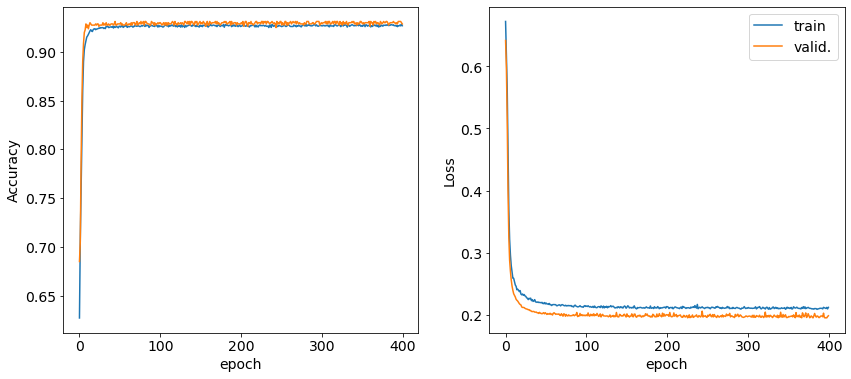

In [26]:
fig,AX=plt.subplots(1,2,figsize=(14,6.))
ax=AX[0]
ax.plot(fit.history['accuracy'],label="train")
ax.plot(fit.history['val_accuracy'],label="valid.")
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")
ax=AX[1]
ax.plot(fit.history['loss'],label="train")
ax.plot(fit.history['val_loss'],label="valid.")
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()

dX = 2
X1 = np.arange(-50,50+dX, dX)
LG = len(X1)
grid = np.zeros((LG*LG,2))
k=0
for i in range(LG):
    for j in range(LG):
        grid[k,:]=(X1[j],X1[i])
        k=k+1
print(len(X1),len(grid))
print(grid[-1])

grid_r = grid/(50+0)

pred = model.predict(grid_r)

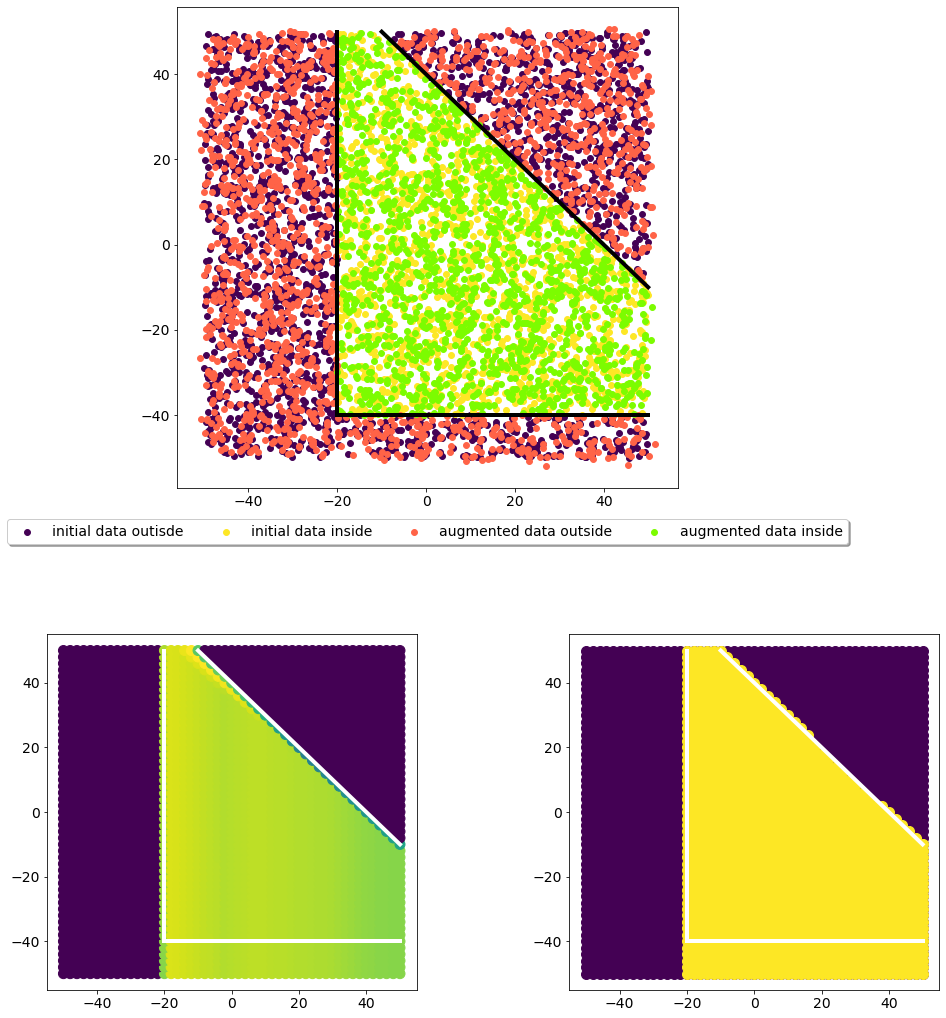

In [27]:
W=np.where(y_aug > 0.5)
Y=np.where(y_aug < 0.5)
X=np.where(y < 0.5)
Z=np.where(y > 0.5)

import matplotlib.gridspec as gridspec 
 
def boundaries_black():     
    ax.plot((-20,-20),(-40,50),c="black",linewidth=4) 
    ax.plot((-20,50),(-40,-40),c="black",linewidth=4) 
    ax.plot((-10,50),(50,-10),c="black", linewidth=4) 
 
 
def boundaries():     
    ax.plot((-20,-20),(-40,50),c="w",linewidth=4) 
    ax.plot((-20,50),(-40,-40),c="w",linewidth=4) 
    ax.plot((-10,50),(50,-10),c="w", linewidth=4) 
 
     
gs = gridspec.GridSpec(11, 7) 
 
plt.figure(figsize=(16,25)) 
ax1 = plt.subplot(gs[0:4, 1:5]) 
ax1.scatter(x[X,0],x[X,1],c="#440154",s=35, label="initial data outisde")  
ax1.scatter(x[Z,0],x[Z,1],c="#fde725",s=35, label="initial data inside")  
ax1.scatter(x_aug[Y,0],x_aug[Y,1],c='tomato',s=35, label="augmented data outside") 
ax1.scatter(x_aug[W,0],x_aug[W,1],c='lawngreen',s=35, label="augmented data inside")  
ax1.legend(loc="best") 
ax=ax1 
boundaries_black() 
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), 
          fancybox=True, shadow=True, ncol=5) 
 
ax2 = plt.subplot(gs[5:8, 0:3]) # row 0, col 1 
ax2.scatter(grid[:,0],grid[:,1],c=pred, s=100) 
ax=ax2 
boundaries() 

W1=np.where(pred>0.5)[0] 
ax3 = plt.subplot(gs[5:8, 4:8]) # row 1, span all columns 
ax3.scatter(grid[:,0],grid[:,1],c="#440154",s=100) 
ax3.scatter(grid[W1,0],grid[W1,1],c="#fde725",s=100) 
ax = ax3 
boundaries()

In [28]:
(x_train, y_train) = (x[0:N_train],y[0:N_train])
(x_valid, y_valid) = (x[N_train:],y[N_train:])
print("Train:",len(x_train),"\t Validation:",len(x_valid))

Train: 3200 	 Validation: 800


In [29]:
x_train_tot, y_train_tot, x_train, y_train, x_aug, y_aug = pick_unif(x_train,y_train)
print(x_train_tot.shape)
print(x_train.shape)
print(x_aug.shape)
print(x_valid.shape)

(6400, 2)
(3200, 2)
(3200, 2)
(800, 2)


In [30]:
def Rescale(x):
    #return (x-x.mean())/np.sqrt(x.var())
    return x/(50+0)

x_train_tot = Rescale(x_train_tot)
x_valid = Rescale(x_valid)

In [31]:
seed_value= 12345
set_seed(seed=seed_value)
model = Sequential()
model.add(Dense(L,input_shape=(L,),activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))
nepoch=400
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_9 (Dense)              (None, 20)                60        
_________________________________________________________________
dense_10 (Dense)             (None, 20)                420       
_________________________________________________________________
dropout_2 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 21        
Total params: 507
Trainable params: 507
Non-trainable params: 0
_________________________________________________________________
None


In [32]:
model.compile(loss='binary_crossentropy',
              #optimizer='RMSprop',
              optimizer='adam',
              metrics=['accuracy'])

In [33]:
fit = model.fit(x_train_tot, y_train_tot,
               epochs = nepoch, batch_size = 50,
               validation_data=(x_valid,y_valid),
               verbose=2)

Epoch 1/400
128/128 - 0s - loss: 0.6722 - accuracy: 0.6272 - val_loss: 0.6420 - val_accuracy: 0.6875
Epoch 2/400
128/128 - 0s - loss: 0.6215 - accuracy: 0.7073 - val_loss: 0.5991 - val_accuracy: 0.7075
Epoch 3/400
128/128 - 0s - loss: 0.5655 - accuracy: 0.7575 - val_loss: 0.5176 - val_accuracy: 0.7850
Epoch 4/400
128/128 - 0s - loss: 0.4600 - accuracy: 0.8166 - val_loss: 0.3970 - val_accuracy: 0.8512
Epoch 5/400
128/128 - 0s - loss: 0.3644 - accuracy: 0.8641 - val_loss: 0.3222 - val_accuracy: 0.8925
Epoch 6/400
128/128 - 0s - loss: 0.3166 - accuracy: 0.8934 - val_loss: 0.2852 - val_accuracy: 0.9125
Epoch 7/400
128/128 - 0s - loss: 0.2933 - accuracy: 0.9050 - val_loss: 0.2694 - val_accuracy: 0.9212
Epoch 8/400
128/128 - 0s - loss: 0.2772 - accuracy: 0.9117 - val_loss: 0.2565 - val_accuracy: 0.9225
Epoch 9/400
128/128 - 0s - loss: 0.2671 - accuracy: 0.9136 - val_loss: 0.2459 - val_accuracy: 0.9275
Epoch 10/400
128/128 - 0s - loss: 0.2560 - accuracy: 0.9183 - val_loss: 0.2394 - val_accura

Epoch 82/400
128/128 - 0s - loss: 0.2136 - accuracy: 0.9275 - val_loss: 0.1977 - val_accuracy: 0.9300
Epoch 83/400
128/128 - 0s - loss: 0.2126 - accuracy: 0.9272 - val_loss: 0.1976 - val_accuracy: 0.9312
Epoch 84/400
128/128 - 0s - loss: 0.2127 - accuracy: 0.9270 - val_loss: 0.1993 - val_accuracy: 0.9300
Epoch 85/400
128/128 - 0s - loss: 0.2120 - accuracy: 0.9277 - val_loss: 0.1987 - val_accuracy: 0.9300
Epoch 86/400
128/128 - 0s - loss: 0.2120 - accuracy: 0.9280 - val_loss: 0.2011 - val_accuracy: 0.9275
Epoch 87/400
128/128 - 0s - loss: 0.2132 - accuracy: 0.9267 - val_loss: 0.1980 - val_accuracy: 0.9312
Epoch 88/400
128/128 - 0s - loss: 0.2130 - accuracy: 0.9273 - val_loss: 0.1980 - val_accuracy: 0.9312
Epoch 89/400
128/128 - 0s - loss: 0.2110 - accuracy: 0.9278 - val_loss: 0.1982 - val_accuracy: 0.9312
Epoch 90/400
128/128 - 0s - loss: 0.2117 - accuracy: 0.9273 - val_loss: 0.1976 - val_accuracy: 0.9287
Epoch 91/400
128/128 - 0s - loss: 0.2115 - accuracy: 0.9272 - val_loss: 0.1980 - v

Epoch 162/400
128/128 - 0s - loss: 0.2085 - accuracy: 0.9278 - val_loss: 0.1984 - val_accuracy: 0.9300
Epoch 163/400
128/128 - 0s - loss: 0.2078 - accuracy: 0.9291 - val_loss: 0.1960 - val_accuracy: 0.9312
Epoch 164/400
128/128 - 0s - loss: 0.2104 - accuracy: 0.9277 - val_loss: 0.1972 - val_accuracy: 0.9300
Epoch 165/400
128/128 - 0s - loss: 0.2091 - accuracy: 0.9286 - val_loss: 0.1985 - val_accuracy: 0.9300
Epoch 166/400
128/128 - 0s - loss: 0.2108 - accuracy: 0.9272 - val_loss: 0.1979 - val_accuracy: 0.9275
Epoch 167/400
128/128 - 0s - loss: 0.2092 - accuracy: 0.9284 - val_loss: 0.1981 - val_accuracy: 0.9287
Epoch 168/400
128/128 - 0s - loss: 0.2095 - accuracy: 0.9281 - val_loss: 0.1984 - val_accuracy: 0.9300
Epoch 169/400
128/128 - 0s - loss: 0.2109 - accuracy: 0.9278 - val_loss: 0.1963 - val_accuracy: 0.9312
Epoch 170/400
128/128 - 0s - loss: 0.2096 - accuracy: 0.9275 - val_loss: 0.1984 - val_accuracy: 0.9300
Epoch 171/400
128/128 - 0s - loss: 0.2083 - accuracy: 0.9280 - val_loss: 

Epoch 242/400
128/128 - 0s - loss: 0.2081 - accuracy: 0.9287 - val_loss: 0.1977 - val_accuracy: 0.9300
Epoch 243/400
128/128 - 0s - loss: 0.2080 - accuracy: 0.9284 - val_loss: 0.1953 - val_accuracy: 0.9312
Epoch 244/400
128/128 - 0s - loss: 0.2088 - accuracy: 0.9286 - val_loss: 0.1987 - val_accuracy: 0.9287
Epoch 245/400
128/128 - 0s - loss: 0.2071 - accuracy: 0.9283 - val_loss: 0.1962 - val_accuracy: 0.9300
Epoch 246/400
128/128 - 0s - loss: 0.2100 - accuracy: 0.9270 - val_loss: 0.1964 - val_accuracy: 0.9300
Epoch 247/400
128/128 - 0s - loss: 0.2093 - accuracy: 0.9270 - val_loss: 0.1981 - val_accuracy: 0.9300
Epoch 248/400
128/128 - 0s - loss: 0.2075 - accuracy: 0.9287 - val_loss: 0.1972 - val_accuracy: 0.9300
Epoch 249/400
128/128 - 0s - loss: 0.2084 - accuracy: 0.9289 - val_loss: 0.1951 - val_accuracy: 0.9312
Epoch 250/400
128/128 - 0s - loss: 0.2078 - accuracy: 0.9286 - val_loss: 0.1987 - val_accuracy: 0.9275
Epoch 251/400
128/128 - 0s - loss: 0.2110 - accuracy: 0.9272 - val_loss: 

Epoch 322/400
128/128 - 0s - loss: 0.2060 - accuracy: 0.9295 - val_loss: 0.1952 - val_accuracy: 0.9312
Epoch 323/400
128/128 - 0s - loss: 0.2086 - accuracy: 0.9283 - val_loss: 0.1958 - val_accuracy: 0.9300
Epoch 324/400
128/128 - 0s - loss: 0.2067 - accuracy: 0.9294 - val_loss: 0.1965 - val_accuracy: 0.9287
Epoch 325/400
128/128 - 0s - loss: 0.2096 - accuracy: 0.9277 - val_loss: 0.1980 - val_accuracy: 0.9300
Epoch 326/400
128/128 - 0s - loss: 0.2061 - accuracy: 0.9291 - val_loss: 0.1960 - val_accuracy: 0.9312
Epoch 327/400
128/128 - 0s - loss: 0.2074 - accuracy: 0.9283 - val_loss: 0.1960 - val_accuracy: 0.9300
Epoch 328/400
128/128 - 0s - loss: 0.2071 - accuracy: 0.9289 - val_loss: 0.1988 - val_accuracy: 0.9300
Epoch 329/400
128/128 - 0s - loss: 0.2076 - accuracy: 0.9281 - val_loss: 0.1963 - val_accuracy: 0.9287
Epoch 330/400
128/128 - 0s - loss: 0.2068 - accuracy: 0.9283 - val_loss: 0.1954 - val_accuracy: 0.9312
Epoch 331/400
128/128 - 0s - loss: 0.2078 - accuracy: 0.9286 - val_loss: 

51 2601
[50. 50.]


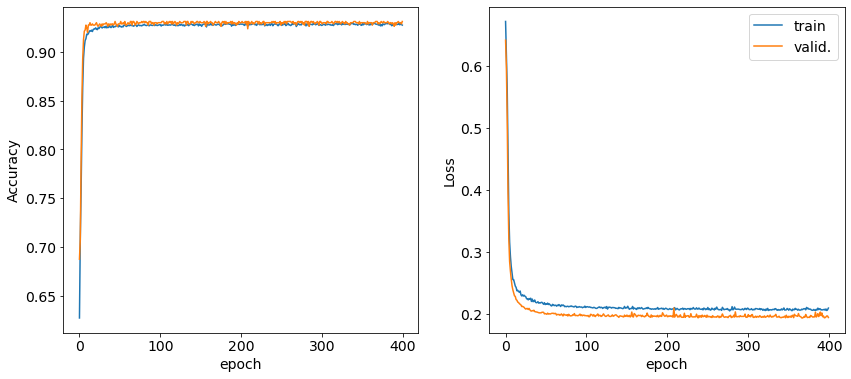

In [34]:
fig,AX=plt.subplots(1,2,figsize=(14,6.))
ax=AX[0]
ax.plot(fit.history['accuracy'],label="train")
ax.plot(fit.history['val_accuracy'],label="valid.")
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")
ax=AX[1]
ax.plot(fit.history['loss'],label="train")
ax.plot(fit.history['val_loss'],label="valid.")
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()

dX = 2
X1 = np.arange(-50,50+dX, dX)
LG = len(X1)
grid = np.zeros((LG*LG,2))
k=0
for i in range(LG):
    for j in range(LG):
        grid[k,:]=(X1[j],X1[i])
        k=k+1
print(len(X1),len(grid))
print(grid[-1])

grid_r = grid/(50+0)

pred = model.predict(grid_r)

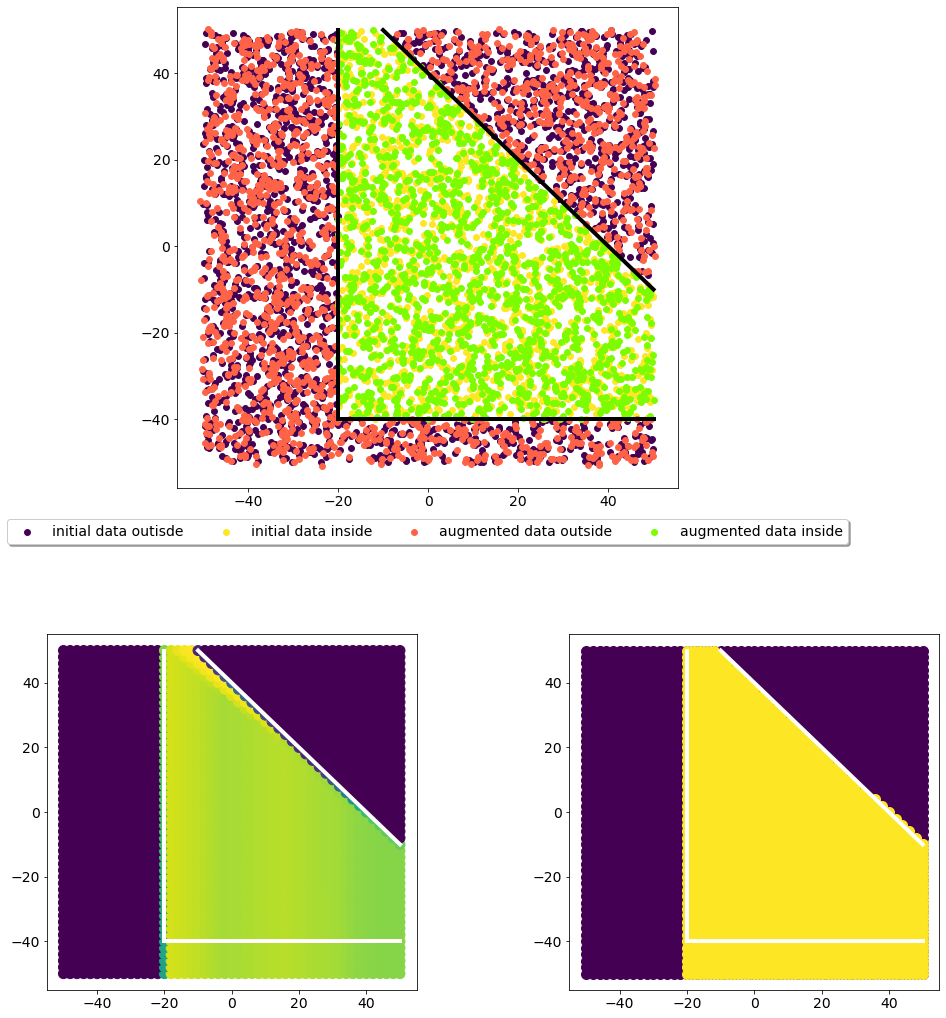

In [35]:
W=np.where(y_aug > 0.5)
Y=np.where(y_aug < 0.5)
X=np.where(y < 0.5)
Z=np.where(y > 0.5)

import matplotlib.gridspec as gridspec 
 
def boundaries_black():     
    ax.plot((-20,-20),(-40,50),c="black",linewidth=4) 
    ax.plot((-20,50),(-40,-40),c="black",linewidth=4) 
    ax.plot((-10,50),(50,-10),c="black", linewidth=4) 
 
 
def boundaries():     
    ax.plot((-20,-20),(-40,50),c="w",linewidth=4) 
    ax.plot((-20,50),(-40,-40),c="w",linewidth=4) 
    ax.plot((-10,50),(50,-10),c="w", linewidth=4) 
 
     
gs = gridspec.GridSpec(11, 7) 
 
plt.figure(figsize=(16,25))
ax1 = plt.subplot(gs[0:4, 1:5]) 
ax1.scatter(x[X,0],x[X,1],c="#440154",s=35, label="initial data outisde")  
ax1.scatter(x[Z,0],x[Z,1],c="#fde725",s=35, label="initial data inside")  
ax1.scatter(x_aug[Y,0],x_aug[Y,1],c='tomato',s=35, label="augmented data outside") 
ax1.scatter(x_aug[W,0],x_aug[W,1],c='lawngreen',s=35, label="augmented data inside")  
ax1.legend(loc="best") 
ax=ax1 
boundaries_black() 
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), 
          fancybox=True, shadow=True, ncol=5) 
 
ax2 = plt.subplot(gs[5:8, 0:3])
ax2.scatter(grid[:,0],grid[:,1],c=pred, s=100) 
ax=ax2 
boundaries() 

W1=np.where(pred>0.5)[0] 
ax3 = plt.subplot(gs[5:8, 4:8]) 
ax3.scatter(grid[:,0],grid[:,1],c="#440154",s=100) 
ax3.scatter(grid[W1,0],grid[W1,1],c="#fde725",s=100) 
ax = ax3 
boundaries()

## TUNING OPTIMIZER

In [36]:
TYPE = 1 

x = np.loadtxt(filename2("data", TYPE), delimiter = ' ') # filename2 loads dataset of 10000 samples
y = np.loadtxt(filename2("labels", TYPE), delimiter = ' ')
N = len(x)

In [37]:
N_train = int(perc_train * N)

In [38]:
x_train, y_train = x[0:N_train], y[0:N_train]
x_valid, y_valid = x[N_train:], y[N_train:]

print("Train:", len(x_train), "\t Validation:", len(x_valid))

Train: 8000 	 Validation: 2000


In [39]:
def Rescale(x):
    #return (x-x.mean())/np.sqrt(x.var())
    return x/50

x_train = Rescale(x_train)
x_valid = Rescale(x_valid)

In [40]:
def create_DNN(optimizer='adam'):
    
    seed_value= 12345
    set_seed(seed=seed_value)
    
    model = Sequential() 
    model.add(Dense(L,input_shape=(L,),activation='relu')) 
    model.add(Dense(20,activation='relu'))
    model.add(Dense(20,activation='relu'))
    model.add(Dropout(0.2)) 
    model.add(Dense(1,activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
    
    print(optimizer)
    
    return model

In [41]:
print('Model compiled successfully and ready to be trained.')

batch_size=50
model_gridsearch = KerasClassifier(build_fn=create_DNN, 
                        epochs=400, 
                        batch_size=batch_size,
                        verbose=0)


optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)
print(param_grid)

grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=1, cv=4)
grid_result = grid.fit(x_train,y_train)


print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Model compiled successfully and ready to be trained.
{'optimizer': ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']}
SGD
SGD
SGD
SGD
RMSprop
RMSprop
RMSprop
RMSprop
Adagrad
Adagrad
Adagrad
Adagrad
Adadelta
Adadelta
Adadelta
Adadelta
Adam
Adam
Adam
Adam
Adamax
Adamax
Adamax
Adamax
Nadam
Nadam
Nadam
Nadam
RMSprop
Best: 0.973875 using {'optimizer': 'RMSprop'}
0.931625 (0.007470) with: {'optimizer': 'SGD'}
0.973875 (0.026510) with: {'optimizer': 'RMSprop'}
0.746500 (0.011495) with: {'optimizer': 'Adagrad'}
0.638625 (0.023713) with: {'optimizer': 'Adadelta'}
0.951250 (0.024131) with: {'optimizer': 'Adam'}
0.935875 (0.014315) with: {'optimizer': 'Adamax'}
0.947375 (0.022140) with: {'optimizer': 'Nadam'}


## TUNING BATCH SIZE

In [42]:
def create_DNN():
    
    seed_value= 12345
    set_seed(seed=seed_value)
    
    model = Sequential() 
    model.add(Dense(L,input_shape=(L,),activation='relu')) 
    model.add(Dense(20,activation='relu'))
    model.add(Dense(20,activation='relu'))
    model.add(Dropout(0.2)) 
    model.add(Dense(1,activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy',
                  optimizer='RMSprop',
                  metrics=['accuracy'])
    
    print(batch_size)
    
    return model

In [43]:
print('Model compiled successfully and ready to be trained.')


model_gridsearch = KerasClassifier(build_fn=create_DNN, 
                        epochs=400,  
                        verbose=0)


batch_size = [10,25,50,100,250,500]
param_grid = dict(batch_size=batch_size)
print(param_grid)


grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=1, cv=4)
grid_result = grid.fit(x_train,y_train)


print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Model compiled successfully and ready to be trained.
{'batch_size': [10, 25, 50, 100, 250, 500]}
[10, 25, 50, 100, 250, 500]
[10, 25, 50, 100, 250, 500]
[10, 25, 50, 100, 250, 500]
[10, 25, 50, 100, 250, 500]
[10, 25, 50, 100, 250, 500]
[10, 25, 50, 100, 250, 500]
[10, 25, 50, 100, 250, 500]
[10, 25, 50, 100, 250, 500]
[10, 25, 50, 100, 250, 500]
[10, 25, 50, 100, 250, 500]
[10, 25, 50, 100, 250, 500]
[10, 25, 50, 100, 250, 500]
[10, 25, 50, 100, 250, 500]
[10, 25, 50, 100, 250, 500]
[10, 25, 50, 100, 250, 500]
[10, 25, 50, 100, 250, 500]
[10, 25, 50, 100, 250, 500]
[10, 25, 50, 100, 250, 500]
[10, 25, 50, 100, 250, 500]
[10, 25, 50, 100, 250, 500]
[10, 25, 50, 100, 250, 500]
[10, 25, 50, 100, 250, 500]
[10, 25, 50, 100, 250, 500]
[10, 25, 50, 100, 250, 500]
[10, 25, 50, 100, 250, 500]
Best: 0.990250 using {'batch_size': 25}
0.988250 (0.003816) with: {'batch_size': 10}
0.990250 (0.002681) with: {'batch_size': 25}
0.973875 (0.026510) with: {'batch_size': 50}
0.947625 (0.024565) with: {'

## TUNING ARCHITECTURE

In [83]:
def create_DNN(hidden_layers=(40,)):
    
    seed_value= 12345
    set_seed(seed=seed_value)
    
    model = Sequential()
    model.add(Dense(L,input_shape=(L,),activation='relu'))
    
    for i in hidden_layers:
        
        model.add(Dense(i, activation='relu'))
                  
    model.add(Dropout(0.2))
    model.add(Dense(1,activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy',
                  optimizer='RMSprop',
                  metrics=['accuracy'])
    
    return model

In [84]:
print('Model compiled successfully and ready to be trained.')

batch_size=25
model_gridsearch = KerasClassifier(build_fn=create_DNN, 
                        epochs=400, 
                        batch_size=batch_size, 
                        verbose=0)


layers = [(40,),(20,20,),(15,10,),(20,15,10,),(10,10,10,10,), (10,20,10,), (20,10,10,20,),(10,20,20,10,)]
param_grid = dict(hidden_layers=layers)
print(param_grid)
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=1, cv=4)
grid_result = grid.fit(x_train,y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print('All scores:')
print(grid.cv_results_)

Model compiled successfully and ready to be trained.
{'hidden_layers': [(40,), (20, 20), (15, 10), (20, 15, 10), (10, 10, 10, 10), (10, 20, 10), (20, 10, 10, 20), (10, 20, 20, 10)]}
Best: 0.993250 using {'hidden_layers': (20, 10, 10, 20)}
0.936125 (0.006777) with: {'hidden_layers': (40,)}
0.990250 (0.002681) with: {'hidden_layers': (20, 20)}
0.986250 (0.008370) with: {'hidden_layers': (15, 10)}
0.992750 (0.001250) with: {'hidden_layers': (20, 15, 10)}
0.991500 (0.001118) with: {'hidden_layers': (10, 10, 10, 10)}
0.988750 (0.004308) with: {'hidden_layers': (10, 20, 10)}
0.993250 (0.001920) with: {'hidden_layers': (20, 10, 10, 20)}
0.987500 (0.005969) with: {'hidden_layers': (10, 20, 20, 10)}
All scores:
{'mean_fit_time': array([26.69532627, 28.52396405, 27.90573865, 29.16158199, 33.42253697,
       29.92832953, 32.53358388, 32.12070829]), 'std_fit_time': array([1.48367063, 0.48942461, 0.61623424, 1.17824668, 1.25318255,
       0.67849103, 0.5806922 , 0.3760552 ]), 'mean_score_time': arr

In [105]:
# lists for plot the mean test score versus the number of parameters
list = [i for i in range(0, 8)]
dict = { "40": 167, "20_20": 507, "15_10":222 , "20_15_10":552 , "10_10_10_10":377 , "10_20_10": 477, "20_10_10_20":627 , "10_20_20_10":897 }
number_of_parameters = [167, 507, 222, 552, 377, 477, 627, 897]

In [106]:
{k: v for k, v in sorted(dict.items(), key=lambda item: item[1])}

{'40': 167,
 '15_10': 222,
 '10_10_10_10': 377,
 '10_20_10': 477,
 '20_20': 507,
 '20_15_10': 552,
 '20_10_10_20': 627,
 '10_20_20_10': 897}

In [107]:
mean_test_scores = means
labels =          ["(40,)",   "(15,10,)",  "(10,10,10,10,)","(10,20,10,)","(20,20,)","(20,15,10,)","(20,10,10,20,)","(10,20,20,10,)"]
colors = ["skyblue", "deepskyblue", "aqua", "dodgerblue", "blue", "mediumblue", "red", "darkblue"]

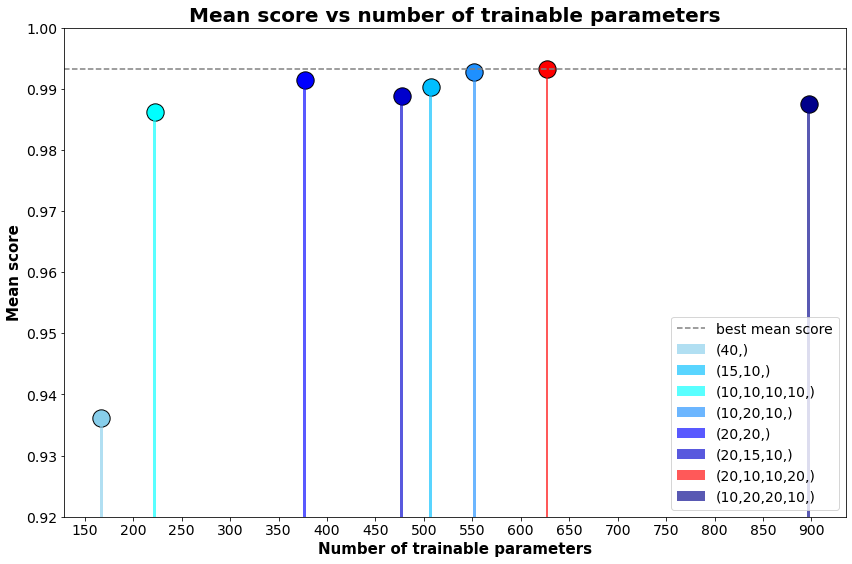

In [108]:
fig, ax = plt.subplots(figsize = (14,9))

for i in range(0,8):
    ax.bar(number_of_parameters[i], mean_test_scores[i] , width=3, linewidth=0.1, label = labels[i], color = colors[i], alpha = 0.65)
    ax.scatter(number_of_parameters[i], mean_test_scores[i],color = colors[i], s = 300, edgecolor = "black")
    ax.set_ylim(0.92, 1)
    
ax.xaxis.set_major_locator(MultipleLocator(50))
ax.yaxis.set_major_locator(MultipleLocator(0.01))
ax.set_xlabel("Number of trainable parameters", fontsize =15, fontweight="bold")
ax.set_ylabel("Mean score", fontsize =15, fontweight="bold")
ax.set_title("Mean score vs number of trainable parameters",fontsize =20, fontweight="bold")

plt.axhline(y=np.max(means), color='grey', linestyle='--', label ="best mean score") #qui aggiungo il max

plt.legend(loc = "best")

## TUNING ACTIVATION FUNCTION

In [46]:
from keras.layers import LeakyReLU, Dense
leaky_relu = LeakyReLU()

In [47]:
def create_DNN(act_func1= "relu" ,act_func2= "sigmoid"):
    
    seed_value= 12345
    set_seed(seed=seed_value)
    
    model = Sequential() 
    model.add(Dense(L,input_shape=(L,),activation='relu')) 
    
    if act_func1=='leaky_relu': # to solve some problems with with the name leaky relu
        model.add(Dense(10, activation=LeakyReLU(alpha=0.1)))
        model.add(Dense(10, activation=LeakyReLU(alpha=0.1)))
        model.add(Dense(10, activation=LeakyReLU(alpha=0.1)))
        model.add(Dense(10, activation=LeakyReLU(alpha=0.1)))
    
    else:
        model.add(Dense(10,activation=act_func1))
        model.add(Dense(10,activation=act_func1))
        model.add(Dense(10,activation=act_func1))
        model.add(Dense(10,activation=act_func1))
        
    model.add(Dropout(0.2)) 
    model.add(Dense(1,activation='sigmoid'))
        
    
    model.compile(loss='binary_crossentropy',
                  optimizer='RMSprop',
                  metrics=['accuracy'])
    
    print(act_func1)
    
    return model

In [48]:
print('Model compiled successfully and ready to be trained.')

model_gridsearch = KerasClassifier(build_fn=create_DNN, 
                        epochs=400, 
                        batch_size=25, 
                        verbose=0)

act_func1 = ["relu", "leaky_relu", "elu", "swish", "selu", "sigmoid", "tanh", "softmax"] 

param_grid = dict(act_func1 = act_func1)
print(param_grid)

grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=1, cv=4)
grid_result = grid.fit(x_train,y_train)


print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print('All scores:')
print(grid.cv_results_)

Model compiled successfully and ready to be trained.
{'act_func1': ['relu', 'leaky_relu', 'elu', 'swish', 'selu', 'sigmoid', 'tanh', 'softmax']}
relu
relu
relu
relu
leaky_relu
leaky_relu
leaky_relu
leaky_relu
elu
elu
elu
elu
swish
swish
swish
swish
selu
selu
selu
selu
sigmoid
sigmoid
sigmoid
sigmoid
tanh
tanh
tanh
tanh
softmax
softmax
softmax
softmax
relu
Best: 0.991500 using {'act_func1': 'relu'}
0.991500 (0.001118) with: {'act_func1': 'relu'}
0.987625 (0.003435) with: {'act_func1': 'leaky_relu'}
0.931000 (0.007228) with: {'act_func1': 'elu'}
0.964500 (0.030830) with: {'act_func1': 'swish'}
0.931000 (0.007408) with: {'act_func1': 'selu'}
0.932875 (0.007709) with: {'act_func1': 'sigmoid'}
0.932250 (0.008019) with: {'act_func1': 'tanh'}
0.931625 (0.008466) with: {'act_func1': 'softmax'}
All scores:
{'mean_fit_time': array([35.67384362, 36.03846657, 36.24998409, 37.25379747, 35.98291785,
       36.32641923, 35.02667218, 36.97180825]), 'std_fit_time': array([0.15687194, 0.13847144, 0.0776

## TUNING DROPOUT

In [49]:
def create_DNN(drop = 0.2):
    
    seed_value= 12345
    set_seed(seed=seed_value)
    
    model = Sequential() 
    model.add(Dense(L,input_shape=(L,),activation='relu')) 
    model.add(Dense(10,activation='relu'))
    model.add(Dense(10,activation='relu'))
    model.add(Dense(10,activation='relu'))
    model.add(Dense(10,activation='relu'))
    model.add(Dropout(drop)) 
    model.add(Dense(1,activation='sigmoid'))
        
    model.compile(loss='binary_crossentropy',
                  optimizer='RMSprop',
                  metrics=['accuracy'])
    
    return model

In [50]:
print('Model compiled successfully and ready to be trained.')

model_gridsearch = KerasClassifier(build_fn=create_DNN, 
                        epochs=400, 
                        batch_size=25, 
                        verbose=0)


drop = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5] 

param_grid = dict(drop = drop)
print(param_grid)

grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=1, cv=4)
grid_result = grid.fit(x_train,y_train)


print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print('All scores:')
print(grid.cv_results_)

Model compiled successfully and ready to be trained.
{'drop': [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]}
Best: 0.991625 using {'drop': 0.05}
0.991625 (0.001596) with: {'drop': 0.05}
0.988500 (0.004373) with: {'drop': 0.1}
0.991500 (0.001118) with: {'drop': 0.2}
0.988875 (0.001980) with: {'drop': 0.3}
0.983375 (0.007995) with: {'drop': 0.4}
0.953000 (0.026921) with: {'drop': 0.5}
All scores:
{'mean_fit_time': array([34.6586535 , 34.67832595, 34.24540597, 35.43190652, 35.33698809,
       35.96873039]), 'std_fit_time': array([0.75209037, 1.60641204, 1.08681649, 0.33809985, 0.87935542,
       0.64283064]), 'mean_score_time': array([0.1173566 , 0.11705869, 0.11080933, 0.11498249, 0.11544341,
       0.11495775]), 'std_score_time': array([0.00823978, 0.00618184, 0.00160211, 0.00041141, 0.00165297,
       0.00097682]), 'param_drop': masked_array(data=[0.05, 0.1, 0.2, 0.3, 0.4, 0.5],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': 

## TUNING WEIGHTS INITIALIZATION

In [51]:
def create_DNN(weight1 = 'he_uniform', weight2 = 'glorot_uniform'):
    
    seed_value= 12345
    set_seed(seed=seed_value)
    
    model = Sequential() 
    model.add(Dense(L,input_shape=(L,),activation='relu', kernel_initializer=weight1)) 
    model.add(Dense(10,activation='relu', kernel_initializer=weight1))
    model.add(Dense(10,activation='relu', kernel_initializer=weight1))
    model.add(Dense(10,activation='relu', kernel_initializer=weight1))
    model.add(Dense(10,activation='relu', kernel_initializer=weight1))
    model.add(Dropout(0.05)) 
    model.add(Dense(1,activation='sigmoid', kernel_initializer=weight2))
    
    model.compile(loss='binary_crossentropy',
                  optimizer='RMSprop',
                  metrics=['accuracy'])
    
    return model

In [52]:
print('Model compiled successfully and ready to be trained.')

batch_size=25
model_gridsearch = KerasClassifier(build_fn=create_DNN, 
                        epochs=400, 
                        batch_size=batch_size, 
                        verbose=0)


weight1 = ['he_uniform', 'he_normal']
weight2 = ['glorot_uniform', 'glorot_normal']
param_grid = dict(weight1=weight1, weight2=weight2)
print(param_grid)
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=1, cv=4)
grid_result = grid.fit(x_train,y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print('All scores:')
print(grid.cv_results_)

Model compiled successfully and ready to be trained.
{'weight1': ['he_uniform', 'he_normal'], 'weight2': ['glorot_uniform', 'glorot_normal']}
Best: 0.991875 using {'weight1': 'he_uniform', 'weight2': 'glorot_normal'}
0.991250 (0.002136) with: {'weight1': 'he_uniform', 'weight2': 'glorot_uniform'}
0.991875 (0.002043) with: {'weight1': 'he_uniform', 'weight2': 'glorot_normal'}
0.984625 (0.003577) with: {'weight1': 'he_normal', 'weight2': 'glorot_uniform'}
0.982750 (0.008976) with: {'weight1': 'he_normal', 'weight2': 'glorot_normal'}
All scores:
{'mean_fit_time': array([32.74964422, 36.39284468, 36.40689212, 38.40512526]), 'std_fit_time': array([1.77931883, 2.29633   , 0.7389769 , 2.4563936 ]), 'mean_score_time': array([0.11811638, 0.17754036, 0.11506665, 0.11764604]), 'std_score_time': array([0.00633833, 0.10584454, 0.00514945, 0.0077974 ]), 'param_weight1': masked_array(data=['he_uniform', 'he_uniform', 'he_normal', 'he_normal'],
             mask=[False, False, False, False],
       fi

## FINAL TEST (FOR GRID SEARCH)

data: 10000
train: 8000


<function matplotlib.pyplot.show(close=None, block=None)>

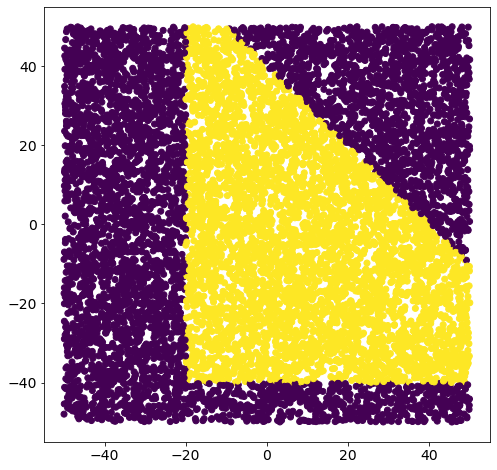

In [53]:
TYPE=1
x = np.loadtxt(filename2("data", TYPE), delimiter = ' ')
y = np.loadtxt(filename2("labels", TYPE), delimiter = ' ')
x_test = np.loadtxt(filename("data test",TYPE), delimiter=' ') # loading test dataset of 4000 samples
y_test = np.loadtxt(filename("labels test",TYPE), delimiter=' ')
N = len(x)

# dim. of a sample
L = len(x[0])

N_train = int(perc_train * N)
print(f'data: {N}\ntrain: {N_train}')

plt.figure(figsize = (8,8))
plt.scatter(x[:,0],x[:,1],c=y)
plt.show

In [54]:
(x_train, y_train) = (x[0:N_train],y[0:N_train])
(x_valid, y_valid) = (x[N_train:],y[N_train:])
print("Train:",len(x_train),"\t Validation:",len(x_valid))

Train: 8000 	 Validation: 2000


In [55]:
def Rescale(x):
    #return (x-x.mean())/np.sqrt(x.var())
    return x/50

x_train = Rescale(x_train)
x_valid = Rescale(x_valid)

In [56]:
seed_value= 12345
set_seed(seed=seed_value)
model = Sequential()
model.add(Dense(L,input_shape=(L,),activation='relu'))
model.add(Dense(10,activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10,activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10,activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10,activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.05))
model.add(Dense(1,activation='sigmoid', kernel_initializer='glorot_normal'))
nepoch=400
print(model.summary())

Model: "sequential_165"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_840 (Dense)            (None, 2)                 6         
_________________________________________________________________
dense_841 (Dense)            (None, 10)                30        
_________________________________________________________________
dense_842 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_843 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_844 (Dense)            (None, 10)                110       
_________________________________________________________________
dropout_165 (Dropout)        (None, 10)                0         
_________________________________________________________________
dense_845 (Dense)            (None, 1)              

In [57]:
model.compile(loss='binary_crossentropy',
              optimizer='RMSprop',
              metrics=['accuracy'])

In [58]:
fit = model.fit(x_train, y_train,
               epochs = nepoch, batch_size = 25,
               verbose=2)

Epoch 1/400
320/320 - 0s - loss: 0.6251 - accuracy: 0.6751
Epoch 2/400
320/320 - 0s - loss: 0.4958 - accuracy: 0.7778
Epoch 3/400
320/320 - 0s - loss: 0.2985 - accuracy: 0.8989
Epoch 4/400
320/320 - 0s - loss: 0.2487 - accuracy: 0.9170
Epoch 5/400
320/320 - 0s - loss: 0.2313 - accuracy: 0.9206
Epoch 6/400
320/320 - 0s - loss: 0.2196 - accuracy: 0.9218
Epoch 7/400
320/320 - 0s - loss: 0.2123 - accuracy: 0.9229
Epoch 8/400
320/320 - 0s - loss: 0.2073 - accuracy: 0.9234
Epoch 9/400
320/320 - 0s - loss: 0.2037 - accuracy: 0.9237
Epoch 10/400
320/320 - 0s - loss: 0.2007 - accuracy: 0.9236
Epoch 11/400
320/320 - 0s - loss: 0.1950 - accuracy: 0.9252
Epoch 12/400
320/320 - 0s - loss: 0.1927 - accuracy: 0.9237
Epoch 13/400
320/320 - 0s - loss: 0.1867 - accuracy: 0.9255
Epoch 14/400
320/320 - 0s - loss: 0.1812 - accuracy: 0.9262
Epoch 15/400
320/320 - 0s - loss: 0.1778 - accuracy: 0.9235
Epoch 16/400
320/320 - 0s - loss: 0.1717 - accuracy: 0.9244
Epoch 17/400
320/320 - 0s - loss: 0.1639 - accura

320/320 - 0s - loss: 0.0275 - accuracy: 0.9883
Epoch 138/400
320/320 - 0s - loss: 0.0272 - accuracy: 0.9893
Epoch 139/400
320/320 - 0s - loss: 0.0277 - accuracy: 0.9895
Epoch 140/400
320/320 - 0s - loss: 0.0254 - accuracy: 0.9902
Epoch 141/400
320/320 - 0s - loss: 0.0243 - accuracy: 0.9900
Epoch 142/400
320/320 - 0s - loss: 0.0265 - accuracy: 0.9893
Epoch 143/400
320/320 - 0s - loss: 0.0289 - accuracy: 0.9879
Epoch 144/400
320/320 - 0s - loss: 0.0264 - accuracy: 0.9898
Epoch 145/400
320/320 - 0s - loss: 0.0284 - accuracy: 0.9879
Epoch 146/400
320/320 - 0s - loss: 0.0242 - accuracy: 0.9902
Epoch 147/400
320/320 - 0s - loss: 0.0270 - accuracy: 0.9901
Epoch 148/400
320/320 - 0s - loss: 0.0248 - accuracy: 0.9900
Epoch 149/400
320/320 - 0s - loss: 0.0284 - accuracy: 0.9896
Epoch 150/400
320/320 - 0s - loss: 0.0260 - accuracy: 0.9896
Epoch 151/400
320/320 - 0s - loss: 0.0242 - accuracy: 0.9893
Epoch 152/400
320/320 - 0s - loss: 0.0254 - accuracy: 0.9895
Epoch 153/400
320/320 - 0s - loss: 0.0

Epoch 272/400
320/320 - 0s - loss: 0.0262 - accuracy: 0.9895
Epoch 273/400
320/320 - 0s - loss: 0.0270 - accuracy: 0.9896
Epoch 274/400
320/320 - 0s - loss: 0.0259 - accuracy: 0.9916
Epoch 275/400
320/320 - 0s - loss: 0.0220 - accuracy: 0.9923
Epoch 276/400
320/320 - 0s - loss: 0.0247 - accuracy: 0.9918
Epoch 277/400
320/320 - 0s - loss: 0.0266 - accuracy: 0.9919
Epoch 278/400
320/320 - 0s - loss: 0.0257 - accuracy: 0.9915
Epoch 279/400
320/320 - 0s - loss: 0.0241 - accuracy: 0.9914
Epoch 280/400
320/320 - 0s - loss: 0.0244 - accuracy: 0.9906
Epoch 281/400
320/320 - 0s - loss: 0.0287 - accuracy: 0.9908
Epoch 282/400
320/320 - 0s - loss: 0.0246 - accuracy: 0.9904
Epoch 283/400
320/320 - 0s - loss: 0.0261 - accuracy: 0.9904
Epoch 284/400
320/320 - 0s - loss: 0.0254 - accuracy: 0.9894
Epoch 285/400
320/320 - 0s - loss: 0.0272 - accuracy: 0.9890
Epoch 286/400
320/320 - 0s - loss: 0.0231 - accuracy: 0.9914
Epoch 287/400
320/320 - 0s - loss: 0.0255 - accuracy: 0.9906
Epoch 288/400
320/320 - 

51 2601
[50. 50.]


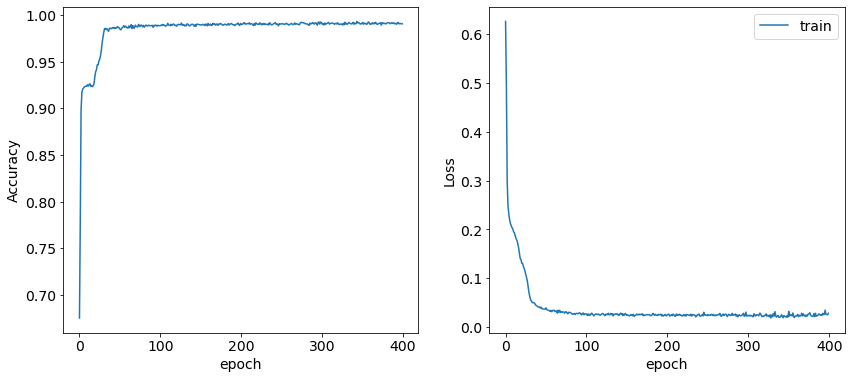

In [59]:
fig,AX=plt.subplots(1,2,figsize=(14,6.))
ax=AX[0]
ax.plot(fit.history['accuracy'],label="train") # not using validation set
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")
ax=AX[1]
ax.plot(fit.history['loss'],label="train") # not using validation set
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()

dX = 2
X1 = np.arange(-50,50+dX, dX)
LG = len(X1)
grid = np.zeros((LG*LG,2))
k=0
for i in range(LG):
    for j in range(LG):
        grid[k,:]=(X1[j],X1[i])
        k=k+1
print(len(X1),len(grid))
print(grid[-1])

grid_r = grid/50

pred = model.predict(grid_r)
pred_test = model.predict(x_test/50).T 
pred_test = np.reshape(pred_test,(4000,))

Accuracy: 0.99275


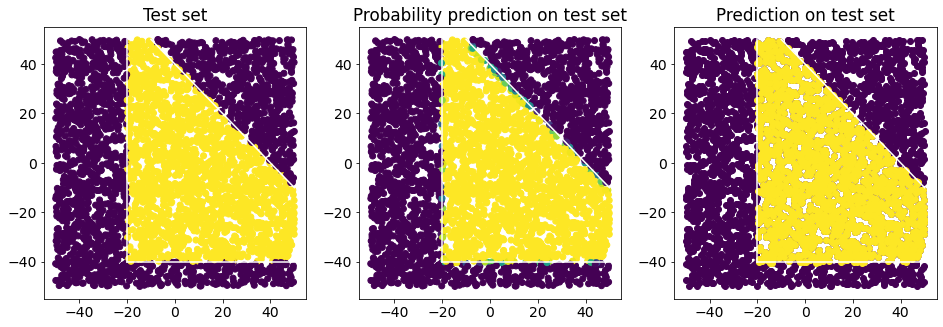

In [60]:
def boundaries():    
    ax.plot((-20,-20),(-40,50),c="w")
    ax.plot((-20,50),(-40,-40),c="w")
    ax.plot((-10,50),(50,-10),c="w")
fig,AX=plt.subplots(1,3,figsize=(16,5.))
ax=AX[0]
ax.scatter(x_test[:,0],x_test[:,1],c=y_test)
ax.set_title('Test set')
boundaries()
ax=AX[1]
ax.scatter(x_test[:,0],x_test[:,1],c=pred_test)
ax.set_title('Probability prediction on test set')
boundaries()
ax=AX[2]
W1=np.where(pred_test>0.5)
ax.scatter(x_test[:,0],x_test[:,1],c="#440154")
ax.scatter(x_test[W1,0],x_test[W1,1],c="#fde725")
ax.set_title('Prediction on test set')
boundaries()
plt.show
plt.show
pred_test[pred_test > 0.5] = 1
pred_test[pred_test < 0.5] = 0
diff = pred_test - y_test
accuracy = len(diff[diff == 0])/len(diff)
print('Accuracy:', accuracy)

## RANDOM SEARCH

In [61]:
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV

data: 10000
train: 8000


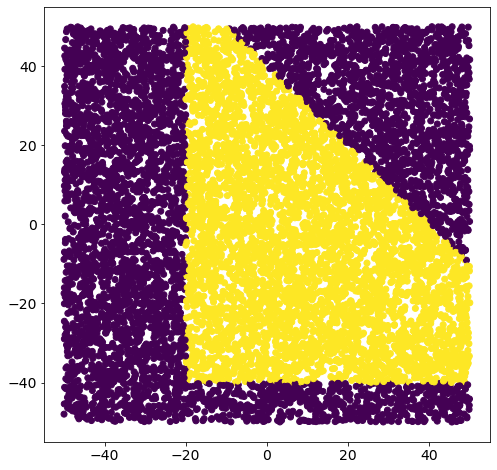

In [64]:
TYPE = 1 

x = np.loadtxt(filename2("data", TYPE), delimiter = ' ')
y = np.loadtxt(filename2("labels", TYPE), delimiter = ' ')
N = len(x)
L = len(x[0])

N_train = int(perc_train * N)
print(f'data: {N}\ntrain: {N_train}')

plt.figure(figsize=(8,8))
plt.scatter(x[:,0], x[:,1], c = y)

In [65]:
x_train, y_train = x[0:N_train], y[0:N_train]
x_valid, y_valid = x[N_train:], y[N_train:]

print("Train:", len(x_train), "\t Validation:", len(x_valid))

Train: 8000 	 Validation: 2000


In [66]:
def Rescale(x):
    #return (x-x.mean())/np.sqrt(x.var())
    return x/50

x_train = Rescale(x_train)
x_valid = Rescale(x_valid)

In [67]:
def create_model(nl = 1, nn = 10, dropout=0.4, optimizer ="Adam", act = 'relu'):
    
    seed = 12345
    set_seed(seed)
    model = Sequential() 
    
    model.add(Dense(L,input_shape=(L,),activation='relu')) #INPUT LAYER 
    
    for i in range(nl):
        model.add(Dense(nn, activation=act))
        
    model.add(Dropout(dropout))
    
    model.add(Dense(1,activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])
    
    return model

In [68]:
model = KerasClassifier(build_fn=create_model, epochs=400, verbose=0)

nl = [i for i in range(1,5)]

nn = [i for i in range(1,40)]

dropout = [i/100 for i in range(10,50)]

optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']

act = ["relu", "elu", "swish", "selu"]

batch_interval = [10, 25, 50, 100, 250, 500]
batch_size = batch_interval

In [69]:
param_grid = dict(nl = nl, nn = nn,  dropout = dropout, optimizer=optimizer,  act = act, batch_size = batch_size )
print(param_grid)

{'nl': [1, 2, 3, 4], 'nn': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39], 'dropout': [0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49], 'optimizer': ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam'], 'act': ['relu', 'elu', 'swish', 'selu'], 'batch_size': [10, 25, 50, 100, 250, 500]}


In [70]:
grid = RandomizedSearchCV(estimator=model, cv=3, param_distributions=param_grid, 
                          verbose=20,  n_iter=50, n_jobs=1)

In [71]:
grid_result = grid.fit(x_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV 1/3; 1/50] START act=swish, batch_size=250, dropout=0.49, nl=2, nn=17, optimizer=Adamax
[CV 1/3; 1/50] END act=swish, batch_size=250, dropout=0.49, nl=2, nn=17, optimizer=Adamax; total time=   4.7s
[CV 2/3; 1/50] START act=swish, batch_size=250, dropout=0.49, nl=2, nn=17, optimizer=Adamax
[CV 2/3; 1/50] END act=swish, batch_size=250, dropout=0.49, nl=2, nn=17, optimizer=Adamax; total time=   5.1s
[CV 3/3; 1/50] START act=swish, batch_size=250, dropout=0.49, nl=2, nn=17, optimizer=Adamax
[CV 3/3; 1/50] END act=swish, batch_size=250, dropout=0.49, nl=2, nn=17, optimizer=Adamax; total time=   5.0s
[CV 1/3; 2/50] START act=relu, batch_size=25, dropout=0.4, nl=4, nn=4, optimizer=Adamax
[CV 1/3; 2/50] END act=relu, batch_size=25, dropout=0.4, nl=4, nn=4, optimizer=Adamax; total time=  29.5s
[CV 2/3; 2/50] START act=relu, batch_size=25, dropout=0.4, nl=4, nn=4, optimizer=Adamax
[CV 2/3; 2/50] END act=relu, batch_size=25, dropou

[CV 3/3; 14/50] END act=relu, batch_size=25, dropout=0.18, nl=1, nn=26, optimizer=Adagrad; total time=  26.5s
[CV 1/3; 15/50] START act=elu, batch_size=100, dropout=0.46, nl=4, nn=31, optimizer=Nadam
[CV 1/3; 15/50] END act=elu, batch_size=100, dropout=0.46, nl=4, nn=31, optimizer=Nadam; total time=  14.0s
[CV 2/3; 15/50] START act=elu, batch_size=100, dropout=0.46, nl=4, nn=31, optimizer=Nadam
[CV 2/3; 15/50] END act=elu, batch_size=100, dropout=0.46, nl=4, nn=31, optimizer=Nadam; total time=  13.9s
[CV 3/3; 15/50] START act=elu, batch_size=100, dropout=0.46, nl=4, nn=31, optimizer=Nadam
[CV 3/3; 15/50] END act=elu, batch_size=100, dropout=0.46, nl=4, nn=31, optimizer=Nadam; total time=  14.1s
[CV 1/3; 16/50] START act=swish, batch_size=100, dropout=0.16, nl=2, nn=20, optimizer=SGD
[CV 1/3; 16/50] END act=swish, batch_size=100, dropout=0.16, nl=2, nn=20, optimizer=SGD; total time=   8.9s
[CV 2/3; 16/50] START act=swish, batch_size=100, dropout=0.16, nl=2, nn=20, optimizer=SGD
[CV 2/3;

[CV 3/3; 28/50] END act=elu, batch_size=10, dropout=0.15, nl=2, nn=25, optimizer=Adamax; total time= 1.2min
[CV 1/3; 29/50] START act=elu, batch_size=500, dropout=0.4, nl=4, nn=23, optimizer=RMSprop
[CV 1/3; 29/50] END act=elu, batch_size=500, dropout=0.4, nl=4, nn=23, optimizer=RMSprop; total time=   5.1s
[CV 2/3; 29/50] START act=elu, batch_size=500, dropout=0.4, nl=4, nn=23, optimizer=RMSprop
[CV 2/3; 29/50] END act=elu, batch_size=500, dropout=0.4, nl=4, nn=23, optimizer=RMSprop; total time=   5.1s
[CV 3/3; 29/50] START act=elu, batch_size=500, dropout=0.4, nl=4, nn=23, optimizer=RMSprop
[CV 3/3; 29/50] END act=elu, batch_size=500, dropout=0.4, nl=4, nn=23, optimizer=RMSprop; total time=   5.2s
[CV 1/3; 30/50] START act=swish, batch_size=100, dropout=0.38, nl=3, nn=4, optimizer=SGD
[CV 1/3; 30/50] END act=swish, batch_size=100, dropout=0.38, nl=3, nn=4, optimizer=SGD; total time=   7.6s
[CV 2/3; 30/50] START act=swish, batch_size=100, dropout=0.38, nl=3, nn=4, optimizer=SGD
[CV 2/3

[CV 2/3; 42/50] END act=elu, batch_size=50, dropout=0.14, nl=2, nn=38, optimizer=SGD; total time=  17.3s
[CV 3/3; 42/50] START act=elu, batch_size=50, dropout=0.14, nl=2, nn=38, optimizer=SGD
[CV 3/3; 42/50] END act=elu, batch_size=50, dropout=0.14, nl=2, nn=38, optimizer=SGD; total time=  17.1s
[CV 1/3; 43/50] START act=swish, batch_size=250, dropout=0.32, nl=3, nn=11, optimizer=SGD
[CV 1/3; 43/50] END act=swish, batch_size=250, dropout=0.32, nl=3, nn=11, optimizer=SGD; total time=   4.6s
[CV 2/3; 43/50] START act=swish, batch_size=250, dropout=0.32, nl=3, nn=11, optimizer=SGD
[CV 2/3; 43/50] END act=swish, batch_size=250, dropout=0.32, nl=3, nn=11, optimizer=SGD; total time=   4.6s
[CV 3/3; 43/50] START act=swish, batch_size=250, dropout=0.32, nl=3, nn=11, optimizer=SGD
[CV 3/3; 43/50] END act=swish, batch_size=250, dropout=0.32, nl=3, nn=11, optimizer=SGD; total time=   4.7s
[CV 1/3; 44/50] START act=swish, batch_size=50, dropout=0.46, nl=2, nn=21, optimizer=Adagrad
[CV 1/3; 44/50] 

In [72]:
cv_results_df = pd.DataFrame(grid_result.cv_results_)
cv_results_df.sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_optimizer,param_nn,param_nl,param_dropout,param_batch_size,param_act,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
5,22.827764,0.142813,0.230160,0.125935,Adamax,24,4,0.3,50,selu,"{'optimizer': 'Adamax', 'nn': 24, 'nl': 4, 'dr...",0.990251,0.992501,0.993248,0.992000,0.001274,1
6,16.879478,0.141171,0.125702,0.012941,Nadam,32,4,0.13,100,selu,"{'optimizer': 'Nadam', 'nn': 32, 'nl': 4, 'dro...",0.991001,0.982752,0.989122,0.987625,0.003530,2
16,84.546730,0.340051,0.165428,0.006494,Adam,15,4,0.3,10,swish,"{'optimizer': 'Adam', 'nn': 15, 'nl': 4, 'drop...",0.981252,0.988376,0.985746,0.985125,0.002941,3
39,35.782378,0.655720,0.135880,0.007781,RMSprop,26,4,0.16,25,selu,"{'optimizer': 'RMSprop', 'nn': 26, 'nl': 4, 'd...",0.954256,0.984252,0.992498,0.977002,0.016433,4
29,7.716869,0.141266,0.209953,0.140055,SGD,4,3,0.38,100,swish,"{'optimizer': 'SGD', 'nn': 4, 'nl': 3, 'dropou...",0.976378,0.967004,0.978995,0.974126,0.005148,5
49,8.752457,0.725263,0.107591,0.001121,Adamax,37,3,0.15,250,swish,"{'optimizer': 'Adamax', 'nn': 37, 'nl': 3, 'dr...",0.920135,0.991751,0.993999,0.968628,0.034302,6
23,5.253480,0.207428,0.104563,0.007121,Nadam,26,3,0.31,500,swish,"{'optimizer': 'Nadam', 'nn': 26, 'nl': 3, 'dro...",0.975628,0.925009,0.941110,0.947249,0.021116,7
45,27.939127,0.781613,0.120556,0.001032,SGD,15,3,0.32,25,relu,"{'optimizer': 'SGD', 'nn': 15, 'nl': 3, 'dropo...",0.979753,0.921635,0.939235,0.946874,0.024334,8
7,32.893950,2.852946,0.128996,0.005007,Adam,19,1,0.49,25,relu,"{'optimizer': 'Adam', 'nn': 19, 'nl': 1, 'drop...",0.928009,0.937383,0.946362,0.937251,0.007493,9
35,70.265118,0.252350,0.146308,0.007479,Adam,34,1,0.13,10,relu,"{'optimizer': 'Adam', 'nn': 34, 'nl': 1, 'drop...",0.932883,0.934383,0.941485,0.936251,0.003752,10


In [82]:
print('Best parameters:')
print(grid_result.best_params_)

Best parameters:
{'optimizer': 'Adamax', 'nn': 24, 'nl': 4, 'dropout': 0.3, 'batch_size': 50, 'act': 'selu'}


In [97]:
# function for counting the number of optimizers with different scores, selecting the types
def counter(name_optimizer, dataframe, n_iter):
    count1 = 0
    count2 = 0
    count3 = 0
    count4 = 0
    count5 = 0


    for j in range(50):
        if (dataframe.at[j,"param_optimizer"] == name_optimizer) and (dataframe.at[j,"mean_test_score"] >= 0.5) and (dataframe.at[j,"mean_test_score"] < 0.6):
                                                                      count1 +=1
        if (dataframe.at[j,"param_optimizer"] == name_optimizer) and (dataframe.at[j,"mean_test_score"] >= 0.6) and (dataframe.at[j,"mean_test_score"] < 0.7):
                                                                      count2 +=1
        if (dataframe.at[j,"param_optimizer"] == name_optimizer) and (dataframe.at[j,"mean_test_score"] >= 0.7) and (dataframe.at[j,"mean_test_score"] < 0.8):
                                                                      count3 +=1 #
        if (dataframe.at[j,"param_optimizer"] == name_optimizer) and (dataframe.at[j,"mean_test_score"] >= 0.8) and (dataframe.at[j,"mean_test_score"] < 0.9):
                                                                      count4 +=1 
        if (dataframe.at[j,"param_optimizer"] == name_optimizer) and (dataframe.at[j,"mean_test_score"] >= 0.9) and (dataframe.at[j,"mean_test_score"] < 1):
                                                                      count5 +=1

    counter = [count1, count2, count3, count4, count5]
    return counter
    

In [98]:
SGD_counter = counter("SGD",cv_results_df,50)
RMSprop_counter = counter("RMSprop",cv_results_df,50)
Adagrad_counter = counter("Adagrad",cv_results_df,50)
Adadelta_counter = counter("Adadelta",cv_results_df,50)
Adam_counter = counter("Adam",cv_results_df,50)
Adamax_counter = counter("Adamax",cv_results_df,50)
Nadam_counter = counter("Nadam",cv_results_df,50)

In [99]:
 def counter_for_each_intervals(index):
    list_of_counter = [SGD_counter, RMSprop_counter, Adagrad_counter, Adadelta_counter, Adam_counter, Adamax_counter, Nadam_counter]
    transpose_counter = []
    for i in list_of_counter:
        transpose_counter.append(i[index])
    return transpose_counter 

In [101]:
for i in range(5):
    print(counter_for_each_intervals(i))

[0, 0, 2, 2, 0, 0, 0]
[0, 0, 4, 5, 0, 0, 0]
[1, 0, 1, 0, 0, 0, 0]
[1, 0, 0, 0, 1, 0, 1]
[6, 3, 0, 0, 4, 9, 10]


In [102]:
df = pd.DataFrame([["0.5 - 0.6", 0,0,2,2,0,0,0], ['0.6 - 0.7',0,0,4,5,0,0,0], ['0.7 - 0.8', 1,0,1,0,0,0,0],
                   ['0.8 - 0.9', 1, 0, 0, 0, 1,0,1], ['0.9 - 1', 6,3,0,0,4,9,10]],
                  columns=['Score intervals', 'SGD', 'RMS', 'Adagrad', 'Adadelta','Adam','Adamax','Nadam'])

df

,Score intervals,SGD,RMS,Adagrad,Adadelta,Adam,Adamax,Nadam
0,0.5 - 0.6,0,0,2,2,0,0,0
1,0.6 - 0.7,0,0,4,5,0,0,0
2,0.7 - 0.8,1,0,1,0,0,0,0
3,0.8 - 0.9,1,0,0,0,1,0,1
4,0.9 - 1,6,3,0,0,4,9,10


Text(0.5, 0, 'Score intervals')

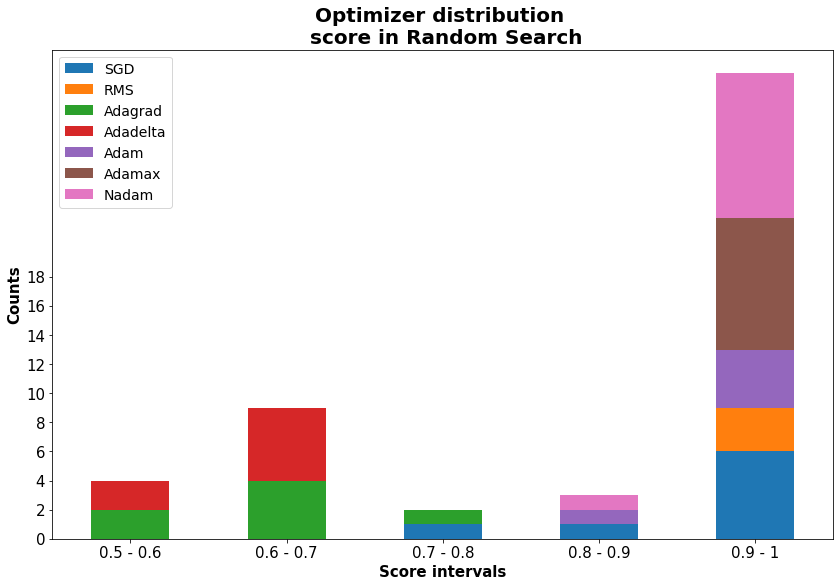

In [104]:
ax =    df.plot(x='Score intervals', kind='bar', stacked=True,
        title='Stacked Bar Graph by dataframe', yticks =[0,2,4,6,8,10,12,14,16,18],
        #color=["aquamarine", "deepskyblue", "aqua", "dodgerblue", "blue", "mediumblue", "cyan"],
        rot=0, fontsize=15,figsize=(14,9))
ax.set_ylabel("Counts", fontsize=15, fontweight="bold")
ax.set_title("Optimizer distribution \n score in Random Search", fontsize=20, fontweight="bold")
ax.set_xlabel("Score intervals",fontsize=15, fontweight="bold" )

## FINAL TEST (FOR RANDOM SEARCH)

data: 10000
train: 8000


<function matplotlib.pyplot.show(close=None, block=None)>

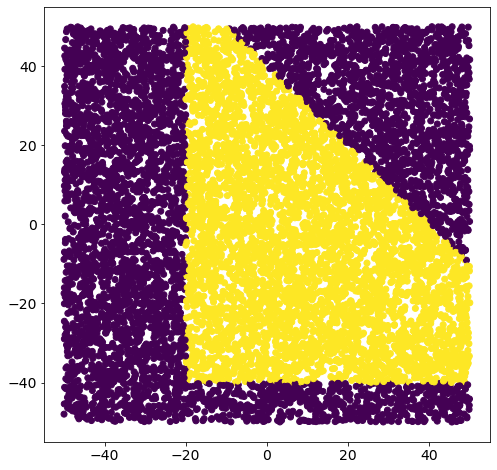

In [74]:
TYPE=1
x = np.loadtxt(filename2("data", TYPE), delimiter = ' ')
y = np.loadtxt(filename2("labels", TYPE), delimiter = ' ')
x_test = np.loadtxt(filename("data test",TYPE), delimiter=' ') # loading test dataset of 4000 samples
y_test = np.loadtxt(filename("labels test",TYPE), delimiter=' ')
N = len(x)

# dim. of a sample
L = len(x[0])

N_train = int(perc_train * N)
print(f'data: {N}\ntrain: {N_train}')

plt.figure(figsize = (8,8))
plt.scatter(x[:,0],x[:,1],c=y)
plt.show

In [75]:
(x_train, y_train) = (x[0:N_train],y[0:N_train])
(x_valid, y_valid) = (x[N_train:],y[N_train:])
print("Train:",len(x_train),"\t Validation:",len(x_valid))

Train: 8000 	 Validation: 2000


In [76]:
def Rescale(x):
    #return (x-x.mean())/np.sqrt(x.var())
    return x/50

x_train = Rescale(x_train)
x_valid = Rescale(x_valid)

In [77]:
seed = 12345
set_seed(seed)
model = Sequential() 
    
model.add(Dense(L,input_shape=(L,),activation='relu')) #INPUT LAYER 
    
for i in range(4):
    model.add(Dense(24, activation='selu'))
        
model.add(Dropout(0.3))
    
model.add(Dense(1,activation='sigmoid'))
    
model.compile(loss='binary_crossentropy',
                optimizer='adamax',
                metrics=['accuracy'])

In [78]:
fit = model.fit(x_train, y_train,
               epochs = 400, batch_size = 50,
               verbose=2)

Epoch 1/400
160/160 - 0s - loss: 0.6348 - accuracy: 0.6208
Epoch 2/400
160/160 - 0s - loss: 0.6022 - accuracy: 0.6572
Epoch 3/400
160/160 - 0s - loss: 0.5708 - accuracy: 0.7212
Epoch 4/400
160/160 - 0s - loss: 0.5379 - accuracy: 0.7498
Epoch 5/400
160/160 - 0s - loss: 0.5134 - accuracy: 0.7738
Epoch 6/400
160/160 - 0s - loss: 0.4906 - accuracy: 0.7904
Epoch 7/400
160/160 - 0s - loss: 0.4666 - accuracy: 0.8151
Epoch 8/400
160/160 - 0s - loss: 0.4407 - accuracy: 0.8351
Epoch 9/400
160/160 - 0s - loss: 0.4072 - accuracy: 0.8558
Epoch 10/400
160/160 - 0s - loss: 0.3662 - accuracy: 0.8805
Epoch 11/400
160/160 - 0s - loss: 0.3328 - accuracy: 0.8944
Epoch 12/400
160/160 - 0s - loss: 0.3107 - accuracy: 0.9019
Epoch 13/400
160/160 - 0s - loss: 0.2919 - accuracy: 0.9045
Epoch 14/400
160/160 - 0s - loss: 0.2812 - accuracy: 0.9053
Epoch 15/400
160/160 - 0s - loss: 0.2691 - accuracy: 0.9136
Epoch 16/400
160/160 - 0s - loss: 0.2599 - accuracy: 0.9155
Epoch 17/400
160/160 - 0s - loss: 0.2571 - accura

160/160 - 0s - loss: 0.0416 - accuracy: 0.9829
Epoch 138/400
160/160 - 0s - loss: 0.0395 - accuracy: 0.9835
Epoch 139/400
160/160 - 0s - loss: 0.0399 - accuracy: 0.9830
Epoch 140/400
160/160 - 0s - loss: 0.0364 - accuracy: 0.9860
Epoch 141/400
160/160 - 0s - loss: 0.0393 - accuracy: 0.9851
Epoch 142/400
160/160 - 0s - loss: 0.0356 - accuracy: 0.9860
Epoch 143/400
160/160 - 0s - loss: 0.0355 - accuracy: 0.9869
Epoch 144/400
160/160 - 0s - loss: 0.0337 - accuracy: 0.9874
Epoch 145/400
160/160 - 0s - loss: 0.0341 - accuracy: 0.9862
Epoch 146/400
160/160 - 0s - loss: 0.0330 - accuracy: 0.9872
Epoch 147/400
160/160 - 0s - loss: 0.0365 - accuracy: 0.9854
Epoch 148/400
160/160 - 0s - loss: 0.0382 - accuracy: 0.9836
Epoch 149/400
160/160 - 0s - loss: 0.0395 - accuracy: 0.9841
Epoch 150/400
160/160 - 0s - loss: 0.0333 - accuracy: 0.9869
Epoch 151/400
160/160 - 0s - loss: 0.0316 - accuracy: 0.9877
Epoch 152/400
160/160 - 0s - loss: 0.0326 - accuracy: 0.9864
Epoch 153/400
160/160 - 0s - loss: 0.0

Epoch 272/400
160/160 - 0s - loss: 0.0275 - accuracy: 0.9880
Epoch 273/400
160/160 - 0s - loss: 0.0267 - accuracy: 0.9900
Epoch 274/400
160/160 - 0s - loss: 0.0225 - accuracy: 0.9906
Epoch 275/400
160/160 - 0s - loss: 0.0221 - accuracy: 0.9914
Epoch 276/400
160/160 - 0s - loss: 0.0356 - accuracy: 0.9869
Epoch 277/400
160/160 - 0s - loss: 0.0199 - accuracy: 0.9912
Epoch 278/400
160/160 - 0s - loss: 0.0218 - accuracy: 0.9918
Epoch 279/400
160/160 - 0s - loss: 0.0276 - accuracy: 0.9889
Epoch 280/400
160/160 - 0s - loss: 0.0280 - accuracy: 0.9891
Epoch 281/400
160/160 - 0s - loss: 0.0253 - accuracy: 0.9889
Epoch 282/400
160/160 - 0s - loss: 0.0216 - accuracy: 0.9909
Epoch 283/400
160/160 - 0s - loss: 0.0296 - accuracy: 0.9864
Epoch 284/400
160/160 - 0s - loss: 0.0196 - accuracy: 0.9926
Epoch 285/400
160/160 - 0s - loss: 0.0243 - accuracy: 0.9895
Epoch 286/400
160/160 - 0s - loss: 0.0195 - accuracy: 0.9916
Epoch 287/400
160/160 - 0s - loss: 0.0263 - accuracy: 0.9887
Epoch 288/400
160/160 - 

51 2601
[50. 50.]


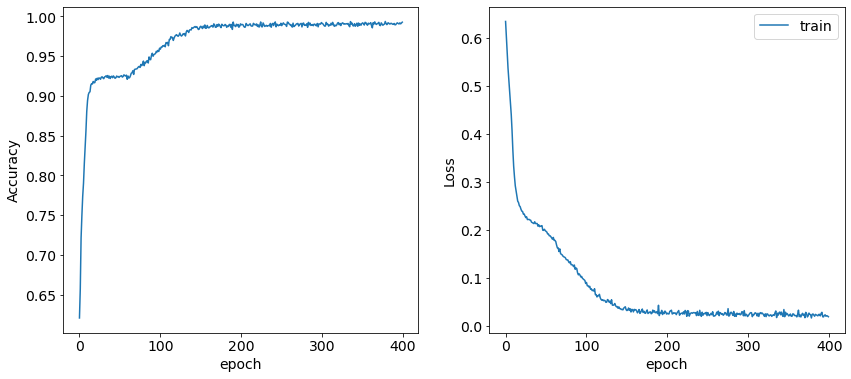

In [79]:
fig,AX=plt.subplots(1,2,figsize=(14,6.))
ax=AX[0]
ax.plot(fit.history['accuracy'],label="train") # not using validation set
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")
ax=AX[1]
ax.plot(fit.history['loss'],label="train") # not using validation set
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()

dX = 2
X1 = np.arange(-50,50+dX, dX)
LG = len(X1)
grid = np.zeros((LG*LG,2))
k=0
for i in range(LG):
    for j in range(LG):
        grid[k,:]=(X1[j],X1[i])
        k=k+1
print(len(X1),len(grid))
print(grid[-1])

grid_r = grid/50

pred = model.predict(grid_r)
pred_test = model.predict(x_test/50).T 
pred_test = np.reshape(pred_test,(4000,))

Accuracy: 0.99675


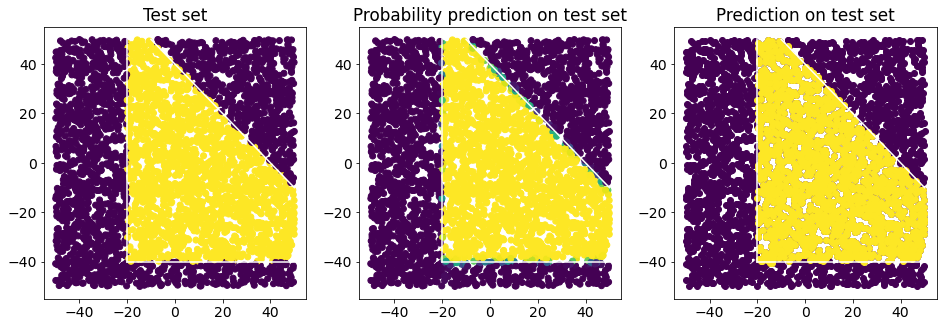

In [80]:
def boundaries():    
    ax.plot((-20,-20),(-40,50),c="w")
    ax.plot((-20,50),(-40,-40),c="w")
    ax.plot((-10,50),(50,-10),c="w")
fig,AX=plt.subplots(1,3,figsize=(16,5.))
ax=AX[0]
ax.scatter(x_test[:,0],x_test[:,1],c=y_test)
ax.set_title('Test set')
boundaries()
ax=AX[1]
ax.scatter(x_test[:,0],x_test[:,1],c=pred_test) # non più grid ma proprio x test
ax.set_title('Probability prediction on test set')
boundaries()
ax=AX[2]
W1=np.where(pred_test>0.5)
ax.scatter(x_test[:,0],x_test[:,1],c="#440154")
ax.scatter(x_test[W1,0],x_test[W1,1],c="#fde725")
ax.set_title('Prediction on test set')
boundaries()
plt.show
plt.show
pred_test[pred_test > 0.5] = 1
pred_test[pred_test < 0.5] = 0
diff = pred_test - y_test
accuracy = len(diff[diff == 0])/len(diff)
print('Accuracy:', accuracy)